# PRCP-1017-AutoPricePred

- **Details:**
   - **Name:** Aditya Kashinath Rampurkar
   - **Project team's ID:** PTID-CDS-JAN-24-1741
   - **Batch Code:** 14-AUG-23-CDS-WDA16-PUN
   - **Registered Email ID:** adityarampurkar6@gmail.com
   - **Registration Number:** +91 9112497837

In [1]:
# Import important libraries
import pandas as pd
import numpy as np

# Import important libraries visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import libraries for handling categorical data
from sklearn.preprocessing import LabelEncoder

# Libraries to split data into Train and Test Data
from sklearn.model_selection import train_test_split

# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Library for statistical operations
from scipy import stats

# Import models algorithms
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

# Libraries to evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Lines from a Text File in Python
with open('auto_imports_names.txt') as f:
    lines = f.readlines()

In [3]:
import pandas as pd

# Specify the paths to the CSV file and the text file with column names
csv_file_path = 'auto_imports.csv'
names_file_path = 'auto_imports_names.txt'

# Read the column names from the text file
with open(names_file_path, 'r') as file:
    column_names = file.read().splitlines()

# Read the CSV file into a pandas DataFrame without specifying column names
data = pd.read_csv(csv_file_path, header=None)

# Assign column names to the DataFrame
data.columns = column_names

In [4]:
# Display dataset
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Basic Checks

In [5]:
# Show first 5 rows of data
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Show last 5 rows of data
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [7]:
# Displaying Unique Values in Each Column of a Dataset
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for symboling:
[ 3  1  2  0 -1 -2]

Unique values for normalized-losses:
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

Unique values for make:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Unique values for fuel-type:
['gas' 'diesel']

Unique values for aspiration:
['std' 'turbo']

Unique values for num-of-doors:
['two' 'four' '?']

Unique values for body-style:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique values for drive-wheels:
['rwd' 'fwd' '4wd']

Unique values for engine-location:
['front' 'rear']

Unique values for wheel-base:


In [8]:
# Print shape of the dataset
print("Shape of the Data: ", data.shape)

Shape of the Data:  (201, 26)


In [9]:
# It will show all details of data 
# Such as Data Types, Total entries, Total numbers of columns, 
# Null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

1. No Missing value
2. some of dtype are wrong in data.info
3. replacing ? with median in numerical column 
4. replacing ? with mode in categorical column

In [10]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# List of columns to replace missing values with median
columns_to_replace = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']

# Convert columns to numeric and replace missing values with median
data[columns_to_replace] = data[columns_to_replace].apply(pd.to_numeric, errors='coerce')
data[columns_to_replace] = data[columns_to_replace].fillna(data[columns_to_replace].median())

In [11]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# List of categorical columns to replace missing values with mode
categorical_columns = ['num-of-doors'] 

# Replace missing values in each specified categorical column with the mode
for column in categorical_columns:
    mode_value = data[column].mode()[0]  # Using [0] to get the first mode if there are multiple
    data[column] = data[column].fillna(mode_value)

In [12]:
# List of columns to convert from float to int
float_to_int_columns = ['normalized-losses','horsepower','peak-rpm']  

# Convert specified columns from float to int
data[float_to_int_columns] = data[float_to_int_columns].astype(float).astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int32  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [14]:
# It will give all statistical information of columns having numerical data type
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,120.711443,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330299,3.257562,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353
std,1.254802,32.111623,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268088,0.316082,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## Observation:

1. Symboling: Range from -2 to 3. Mean symboling is approximately 0.84.
2. Normalized Losses:Range from 65 to 256. Mean normalized losses are approximately 120.71.
3. Wheel-Base: Range from 86.6 to 120.9. Mean wheel-base is approximately 98.8.
4. Length, Width, Height: Varying ranges for length, width, and height. Mean length is approximately 174.2, mean width is      approximately 65.9, and mean height is approximately 53.8.
5. Curb Weight:Range from 1488 to 4066. Mean curb weight is approximately 2555.67.
6. Engine Size: Range from 61 to 326. Mean engine size is approximately 126.88.
7. Bore and Stroke: Bore ranges from 2.54 to 3.94, while stroke ranges from 2.07 to 4.17. Mean bore is approximately 3.33,      and mean stroke is approximately 3.26.
8. Compression Ratio: Ranges from 7 to 23. Mean compression ratio is approximately 10.16.
9. Horsepower and Peak RPM: Horsepower ranges from 48 to 262, while peak RPM ranges from 4150 to 6600. Mean horsepower is      approximately 103.31, and mean peak RPM is approximately 5118.41.
10. City and Highway MPG: City MPG ranges from 13 to 49, while highway MPG ranges from 16 to 54. Mean city MPG is          approximately 25.18, and mean highway MPG is approximately 30.69.
11. Price: Price ranges from 5118 to 45400. Mean price is approximately 13207.13.

In [15]:
# It will give all statistical information of columns having categorical data type
data.describe(include='O')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


## Observation:

1. The majority of individuals prefer cars from the Toyota company.
2. Gasoline is the predominant choice for fuel type among users.
3. Standard aspiration is the most commonly chosen option among users.
4. Four-door configurations are prevalent among the majority of users.
5. Sedan is the predominant body style among most users' cars.
6. Front-engine placement is the prevailing configuration among cars.
7. Four cylinders are the most commonly supported engine type in cars.
8. OHC (Overhead Camshaft) is the predominant engine type chosen by most users.
9. The majority of the cars have front-wheel drive (fwd).
10. Most of the cars have the fuel system configured as Multi-Point Fuel Injection (mpfi).

In [16]:
# Finding duplicates observations
data.duplicated().sum()

0

1. No duplicate value  

In [17]:
# Checking percentage of null values in each columns
(data.isnull().sum()/(len(data)))*100

symboling            0.0
normalized-losses    0.0
make                 0.0
fuel-type            0.0
aspiration           0.0
num-of-doors         0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
engine-type          0.0
num-of-cylinders     0.0
engine-size          0.0
fuel-system          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
dtype: float64

In [18]:
# Names of all columns
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [19]:
# Numeric Columns in dataset
numeric_car = data.select_dtypes(include="number") # select_dtypes selects data with numeric features
car_numeric = numeric_car.columns 
print("Number of columns having numerical values:", len(car_numeric))
print("\nNames of columns having numerical values:", list(car_numeric))

Number of columns having numerical values: 16

Names of columns having numerical values: ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [20]:
# Categorical Columns in dataset
cat_car = data.select_dtypes(exclude="number") 
car_categorical = cat_car.columns 
print("Number of columns having categorical value:", len(car_categorical))
print("\n""Names of columns having categorical value:\n", list(car_categorical))

Number of columns having categorical value: 10

Names of columns having categorical value:
 ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


## Univariant analysis

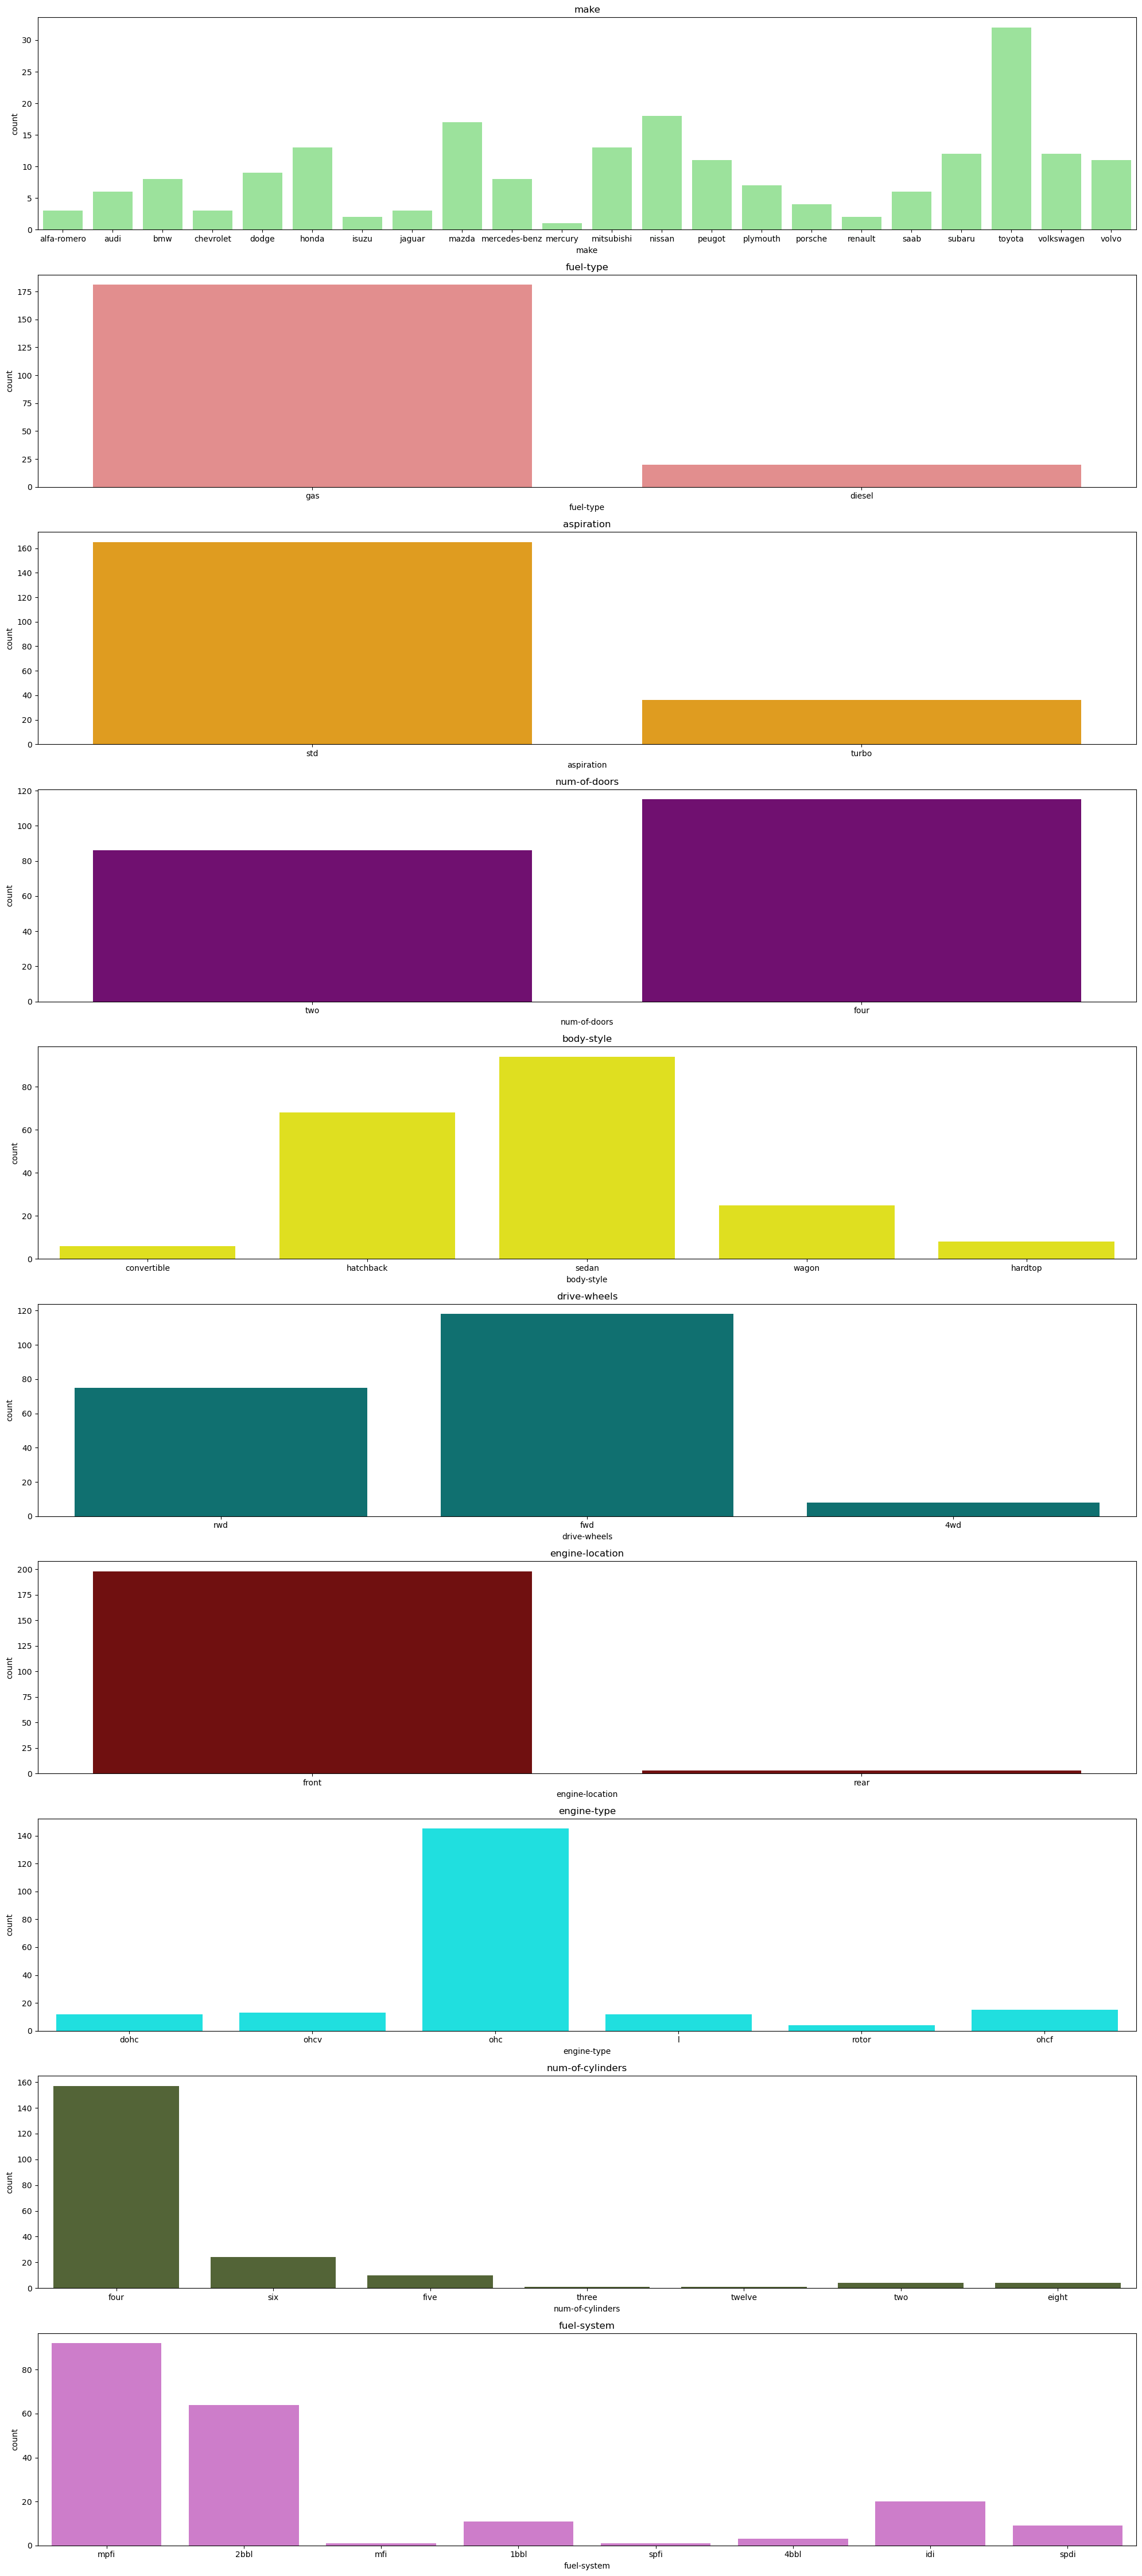

In [21]:
# Select the categorical columns
categorical_col = data.select_dtypes(include=['object']).columns

# It will use represent different graphs with different colors
colors = [
    'skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 
    'yellow',  'teal', 'maroon', 'cyan', 'darkolivegreen', 'orchid', 'turquoise'
]

# Plotting a countplot for each of the categorical variables
plt.figure(figsize=(20, 45))  # Canvas size

for i, column in enumerate(categorical_col, 1):
    plt.subplot(10, 1, i)  
    sns.countplot(x=column, data=data, palette=[colors[i]])
    
    plt.title(column)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Observation:

1. Toyota,nissan and mazda make more car than any other company.
2. Most of the car have fule-type as gasolin.
3. Most of the car having standard as aspiration
4. Most of the car are having body-style as sedan followed by hatchbag
5. Most commanly use engine-type in a car is ohc
7. fuel-system used by most of the car is mpfi
8. most of the car are having 4 nun-of-cylinder in a car

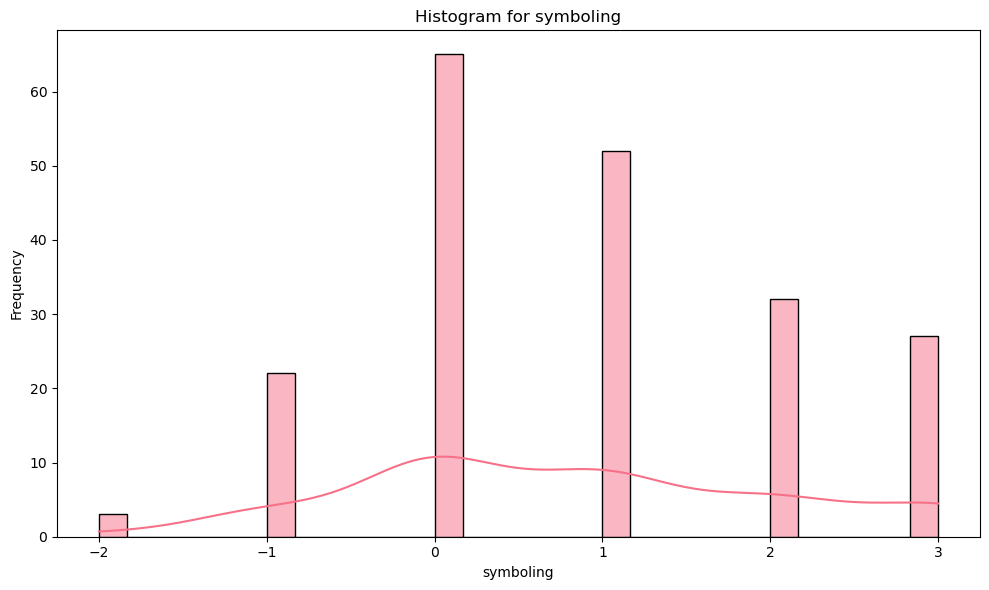

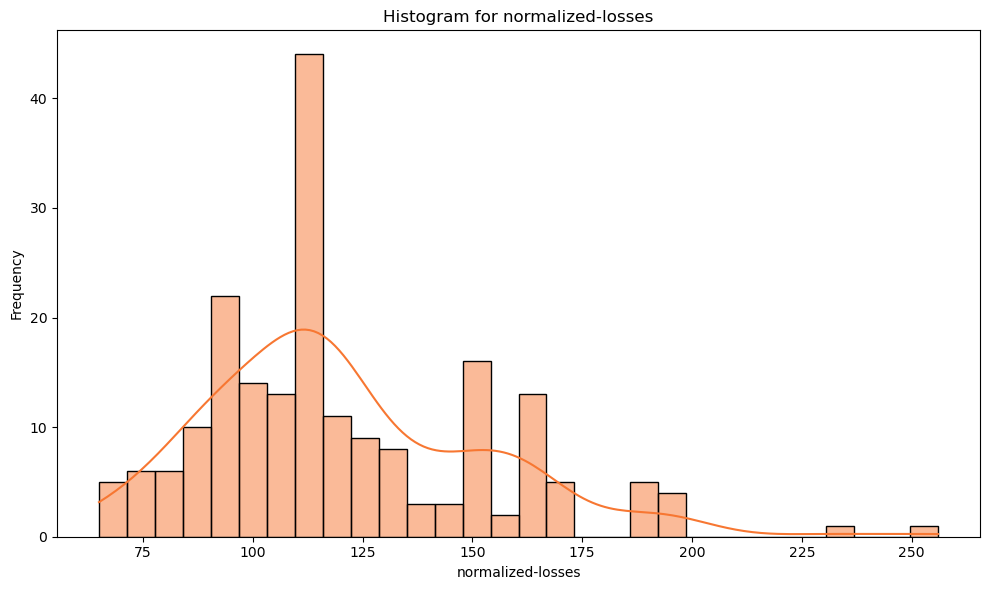

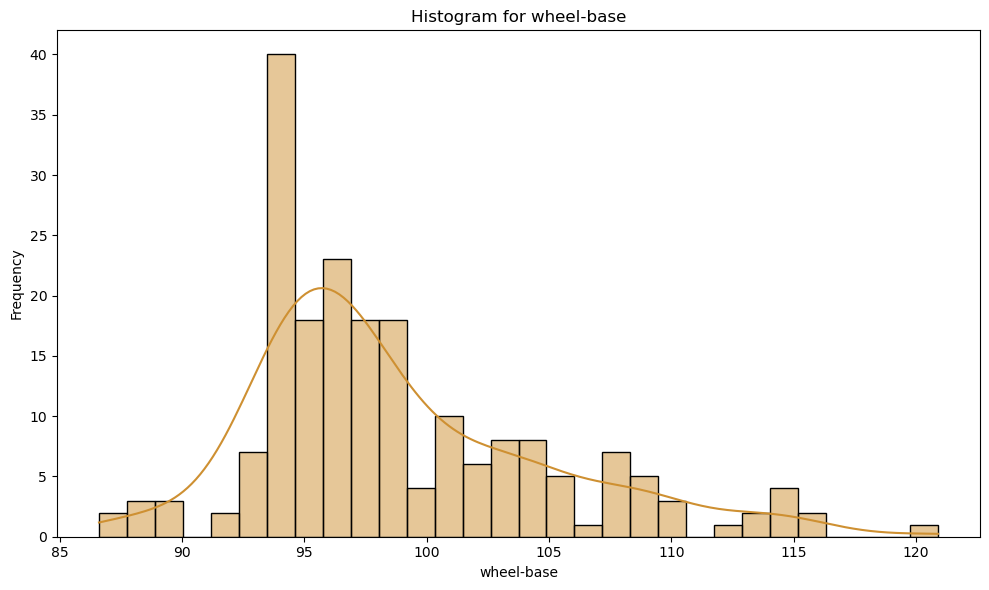

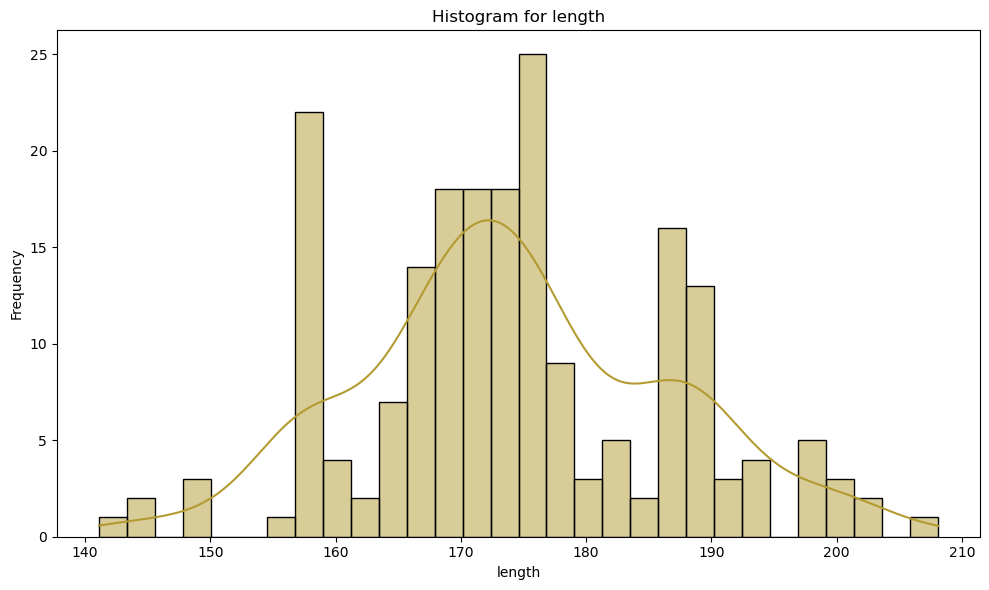

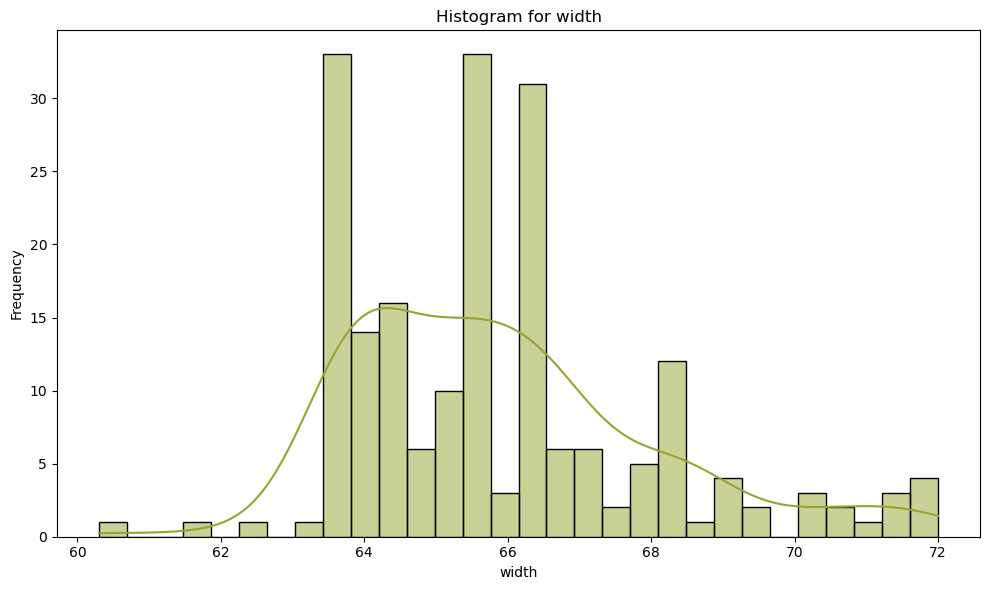

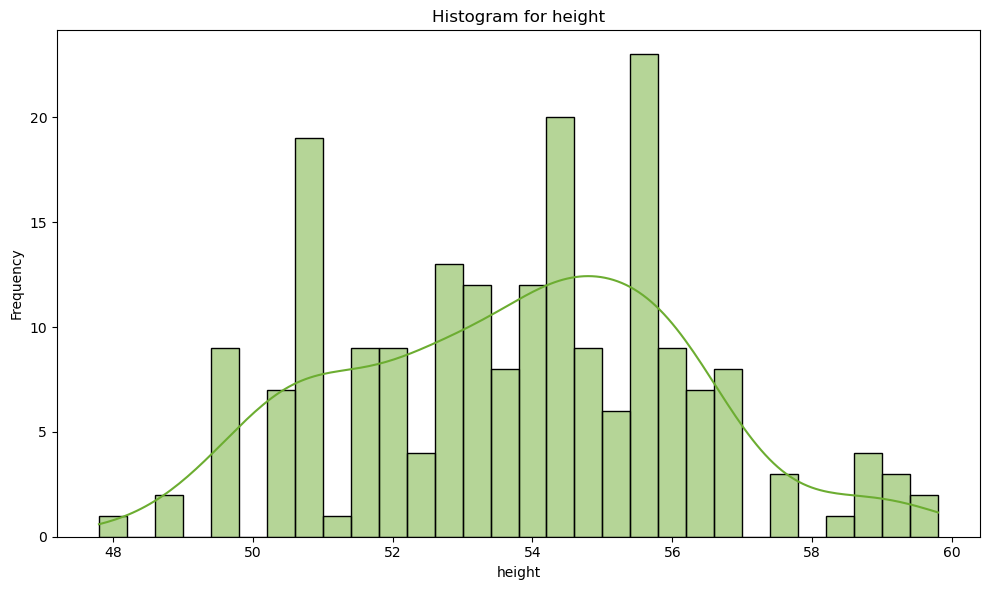

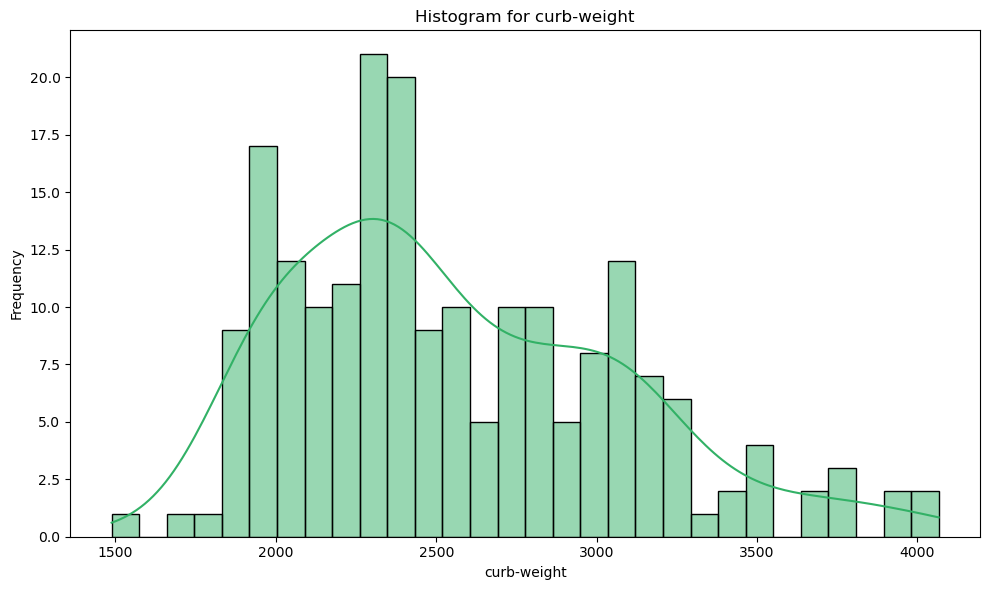

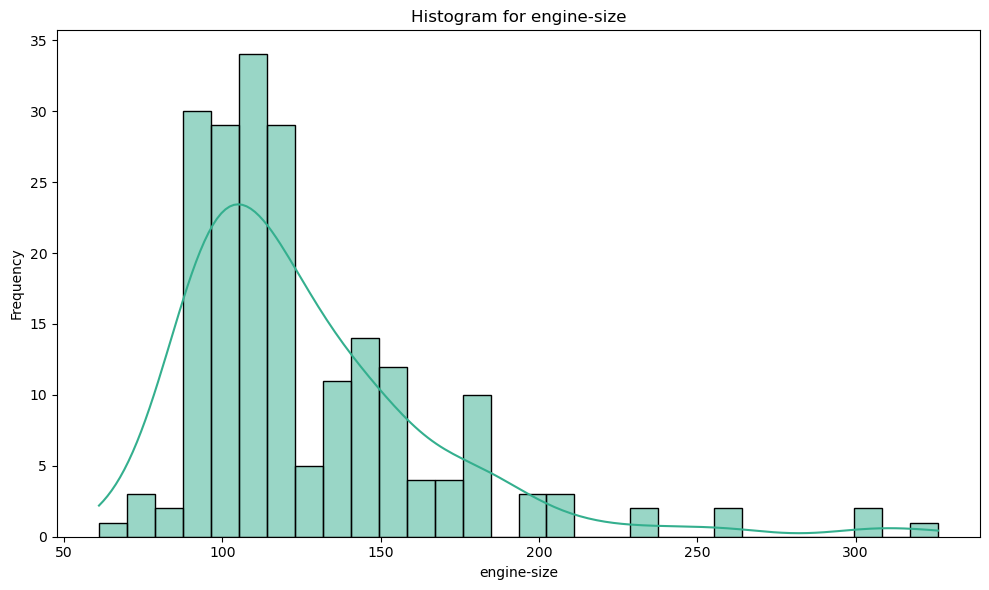

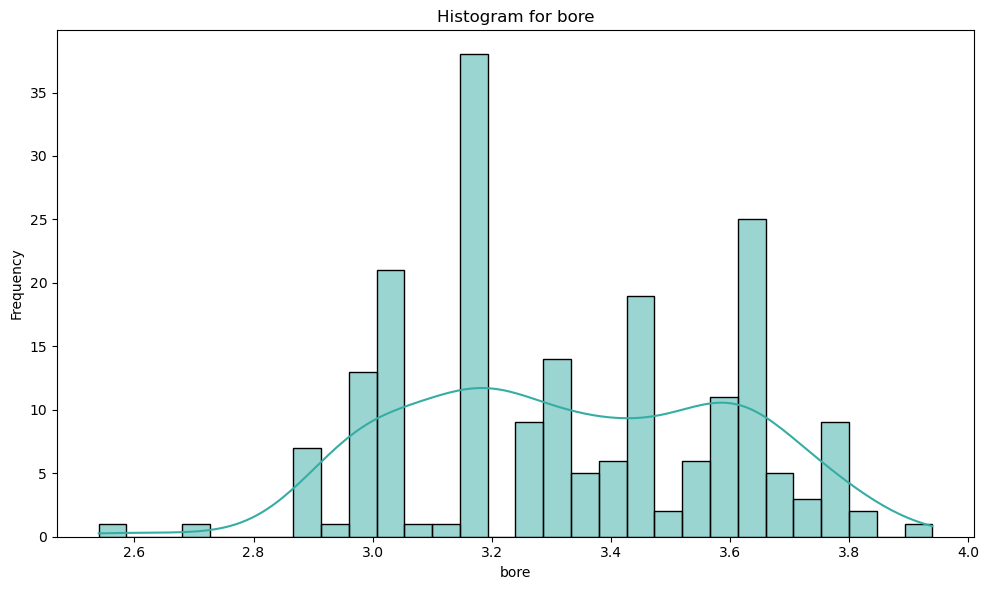

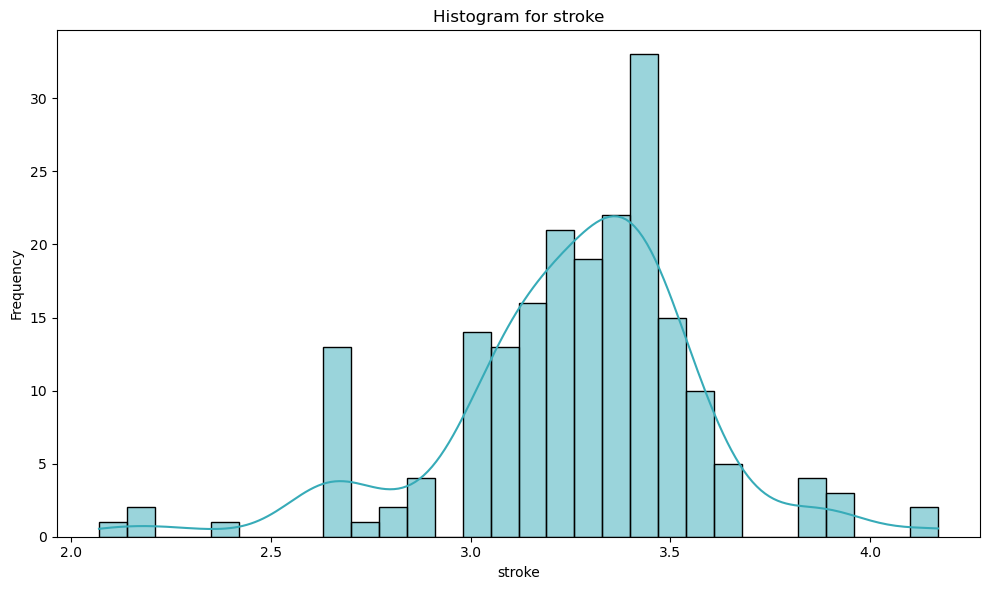

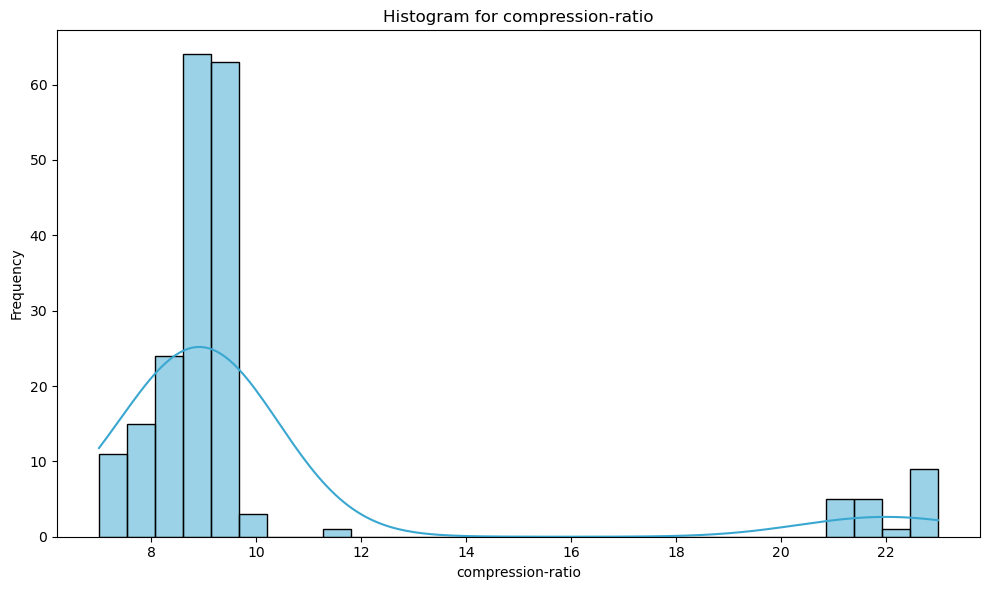

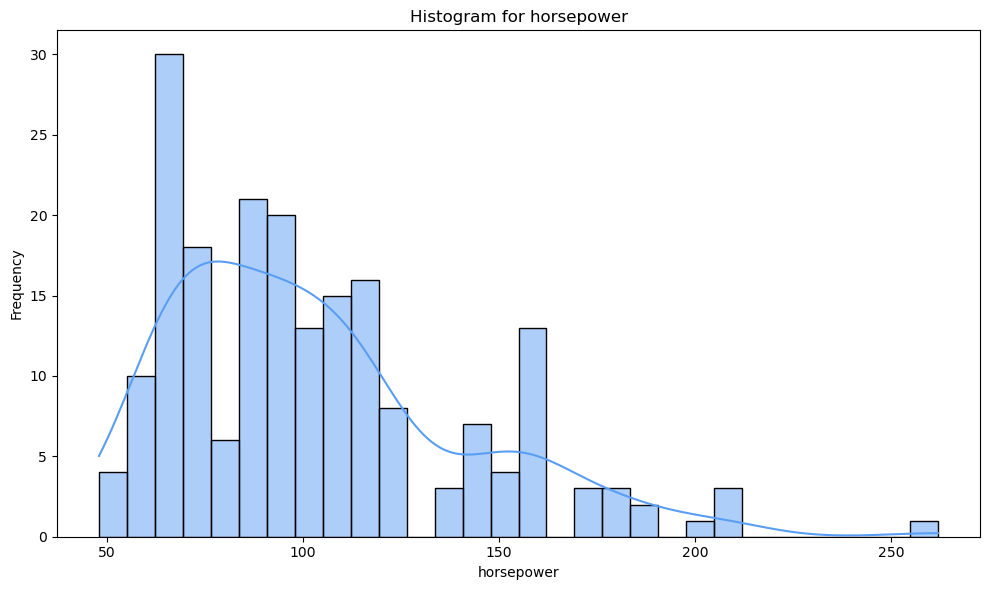

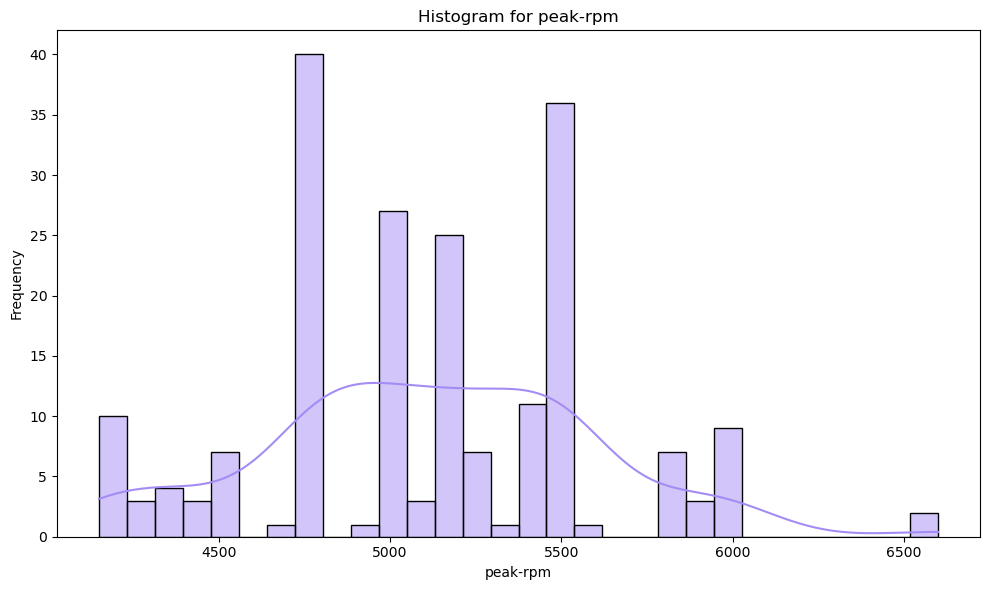

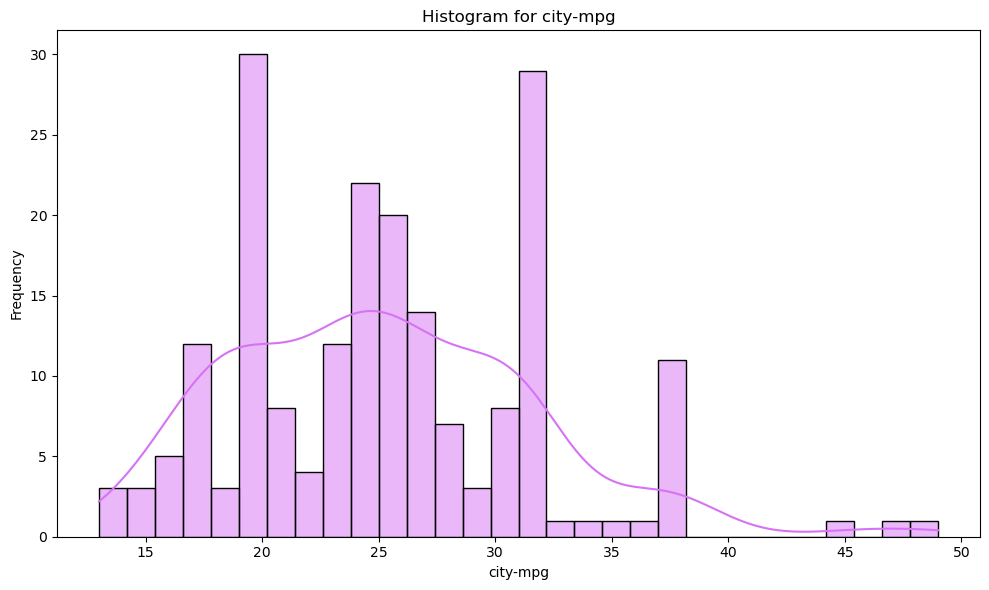

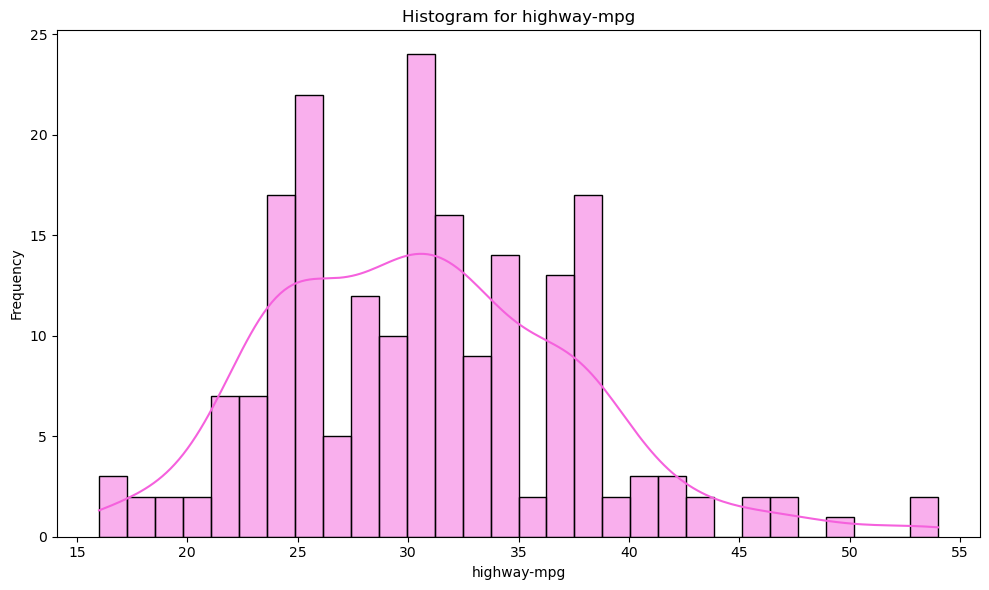

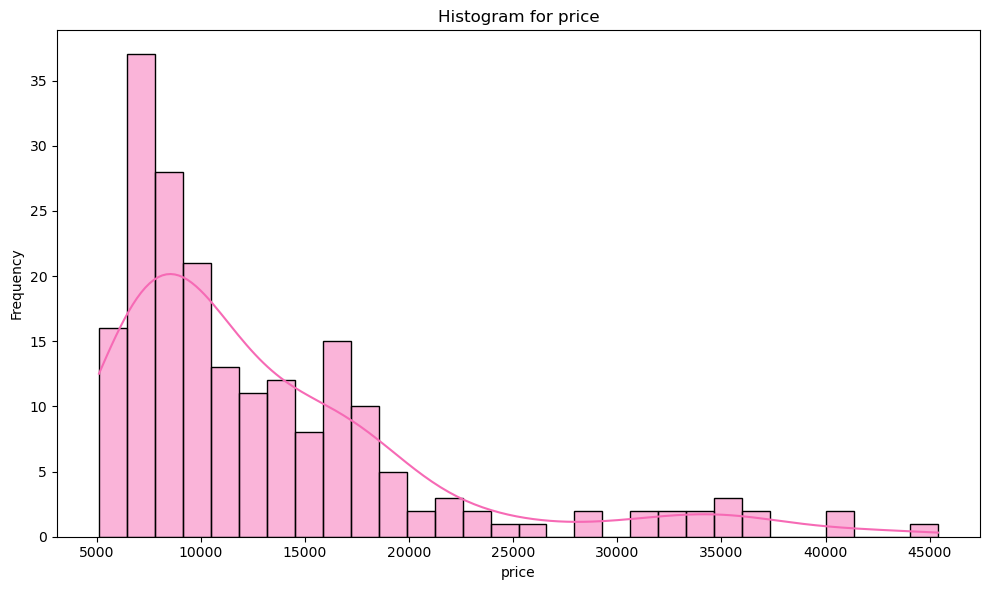

In [22]:
# Set a color palette with different colors for each histogra
colors = sns.color_palette("husl", n_colors=len(car_numeric))

# Plotting a histogram for each continuous variable with different colors
for i, column in enumerate(car_numeric):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, bins=30, color=colors[i], kde=True)
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

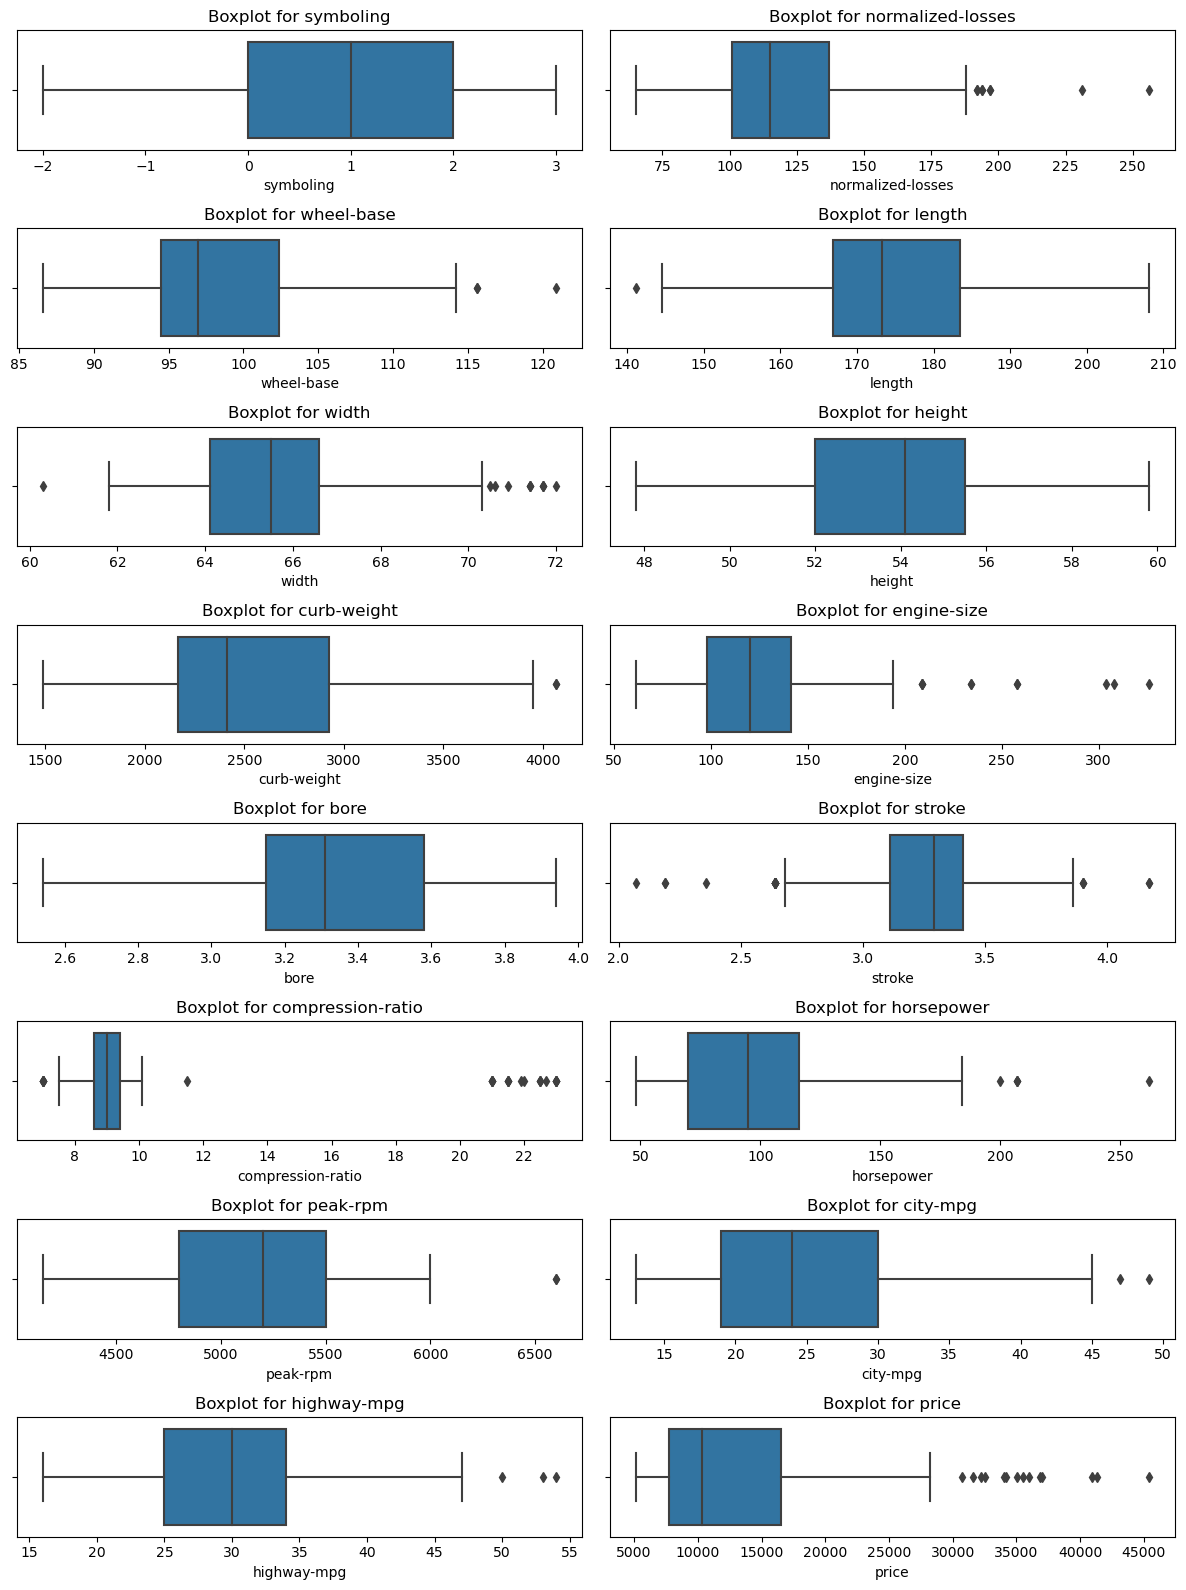

In [23]:
# Plotting of BoxPlot to check presence of Outliers

fig, axes = plt.subplots(8, 2, figsize=(12, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(car_numeric):
    sns.boxplot(x=column, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Observation:

Outlier found in columns:

1. normalized-losses
2. wheel-base
3. length
4. width
5. curb-height
6. engine-size
7. stroke
8. compression-ratio
9. horsepower
10. peak-rpm
11. city-mpg
12. highway-mpg
13. price

## Bivariant analysis

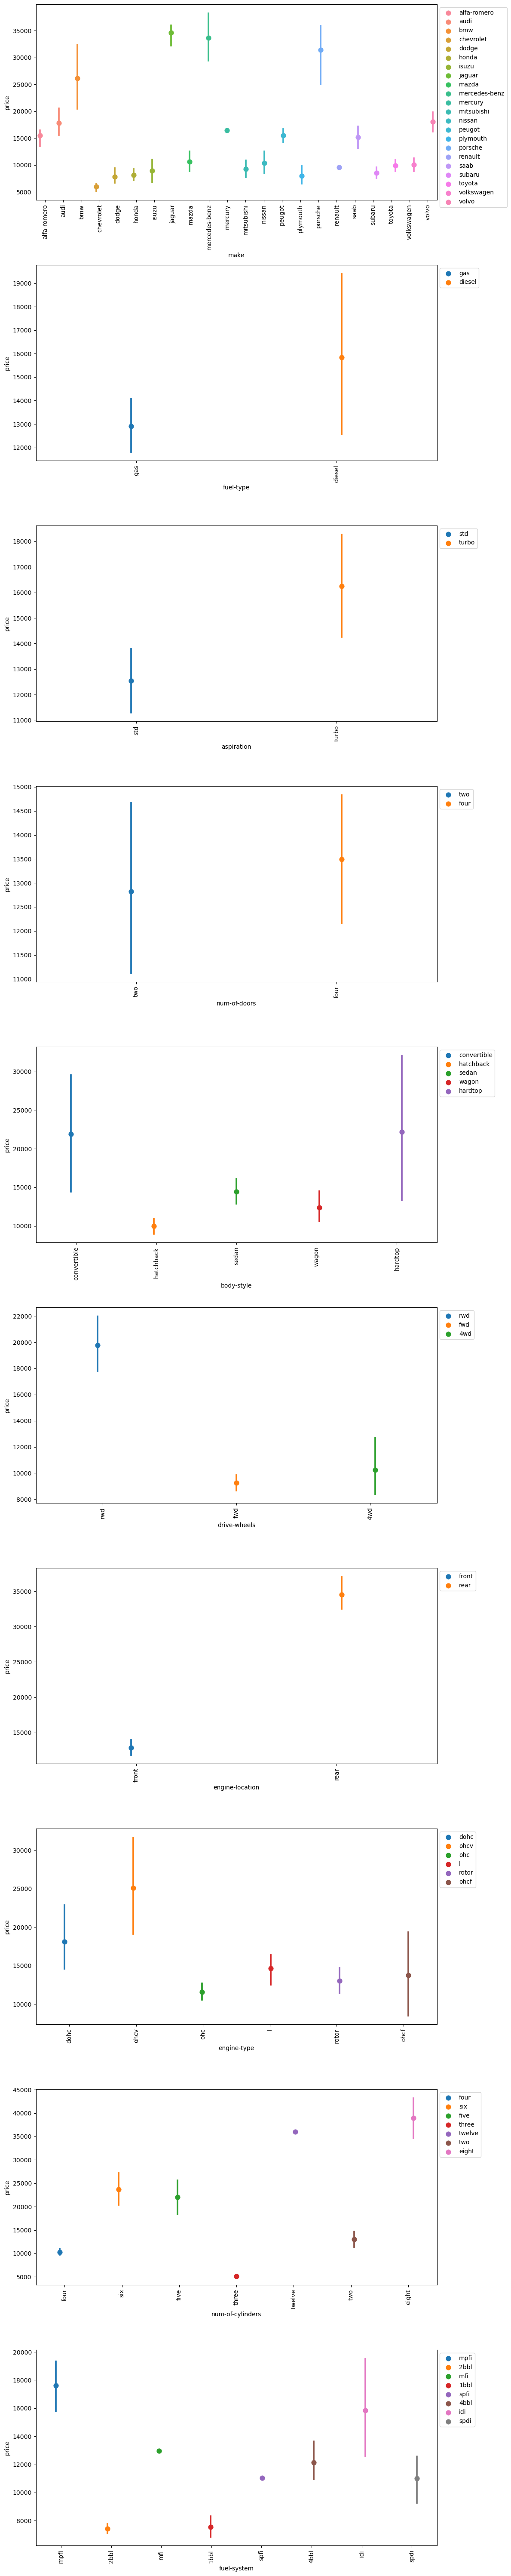

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                        'drive-wheels', 'engine-location', 'engine-type', 
                        'num-of-cylinders', 'fuel-system']

# Set a larger figure size if needed
plt.figure(figsize=(12, 60))

# Create point plots for each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(10, 1, i)
    sns.pointplot(x=column, y='price', data=data, dodge=True, linestyles='-',hue=column)
    plt.xticks(rotation=90)
    
    # Move the legend outside the plot for better visibility
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## Observation

1. Mercedes-Benz, Jaguar, and Porsche make more expensive cars than any other company.
2. Mercury makes cars of the same price.
3. Chevrolet, Mazda, and Honda make less expensive cars.
4. Most cars with prices above 14,000 have a diesel fuel-type.
5. Hardtop cars have a higher price than hatchbacks.
6. Cars with higher prices mostly use rear-wheel drive, while lower-priced cars use front-wheel drive.
7. Cars with a high price use an OHCV engine type.
8. While low-priced cars use an OHCF engine type.

## Multivarient analysis

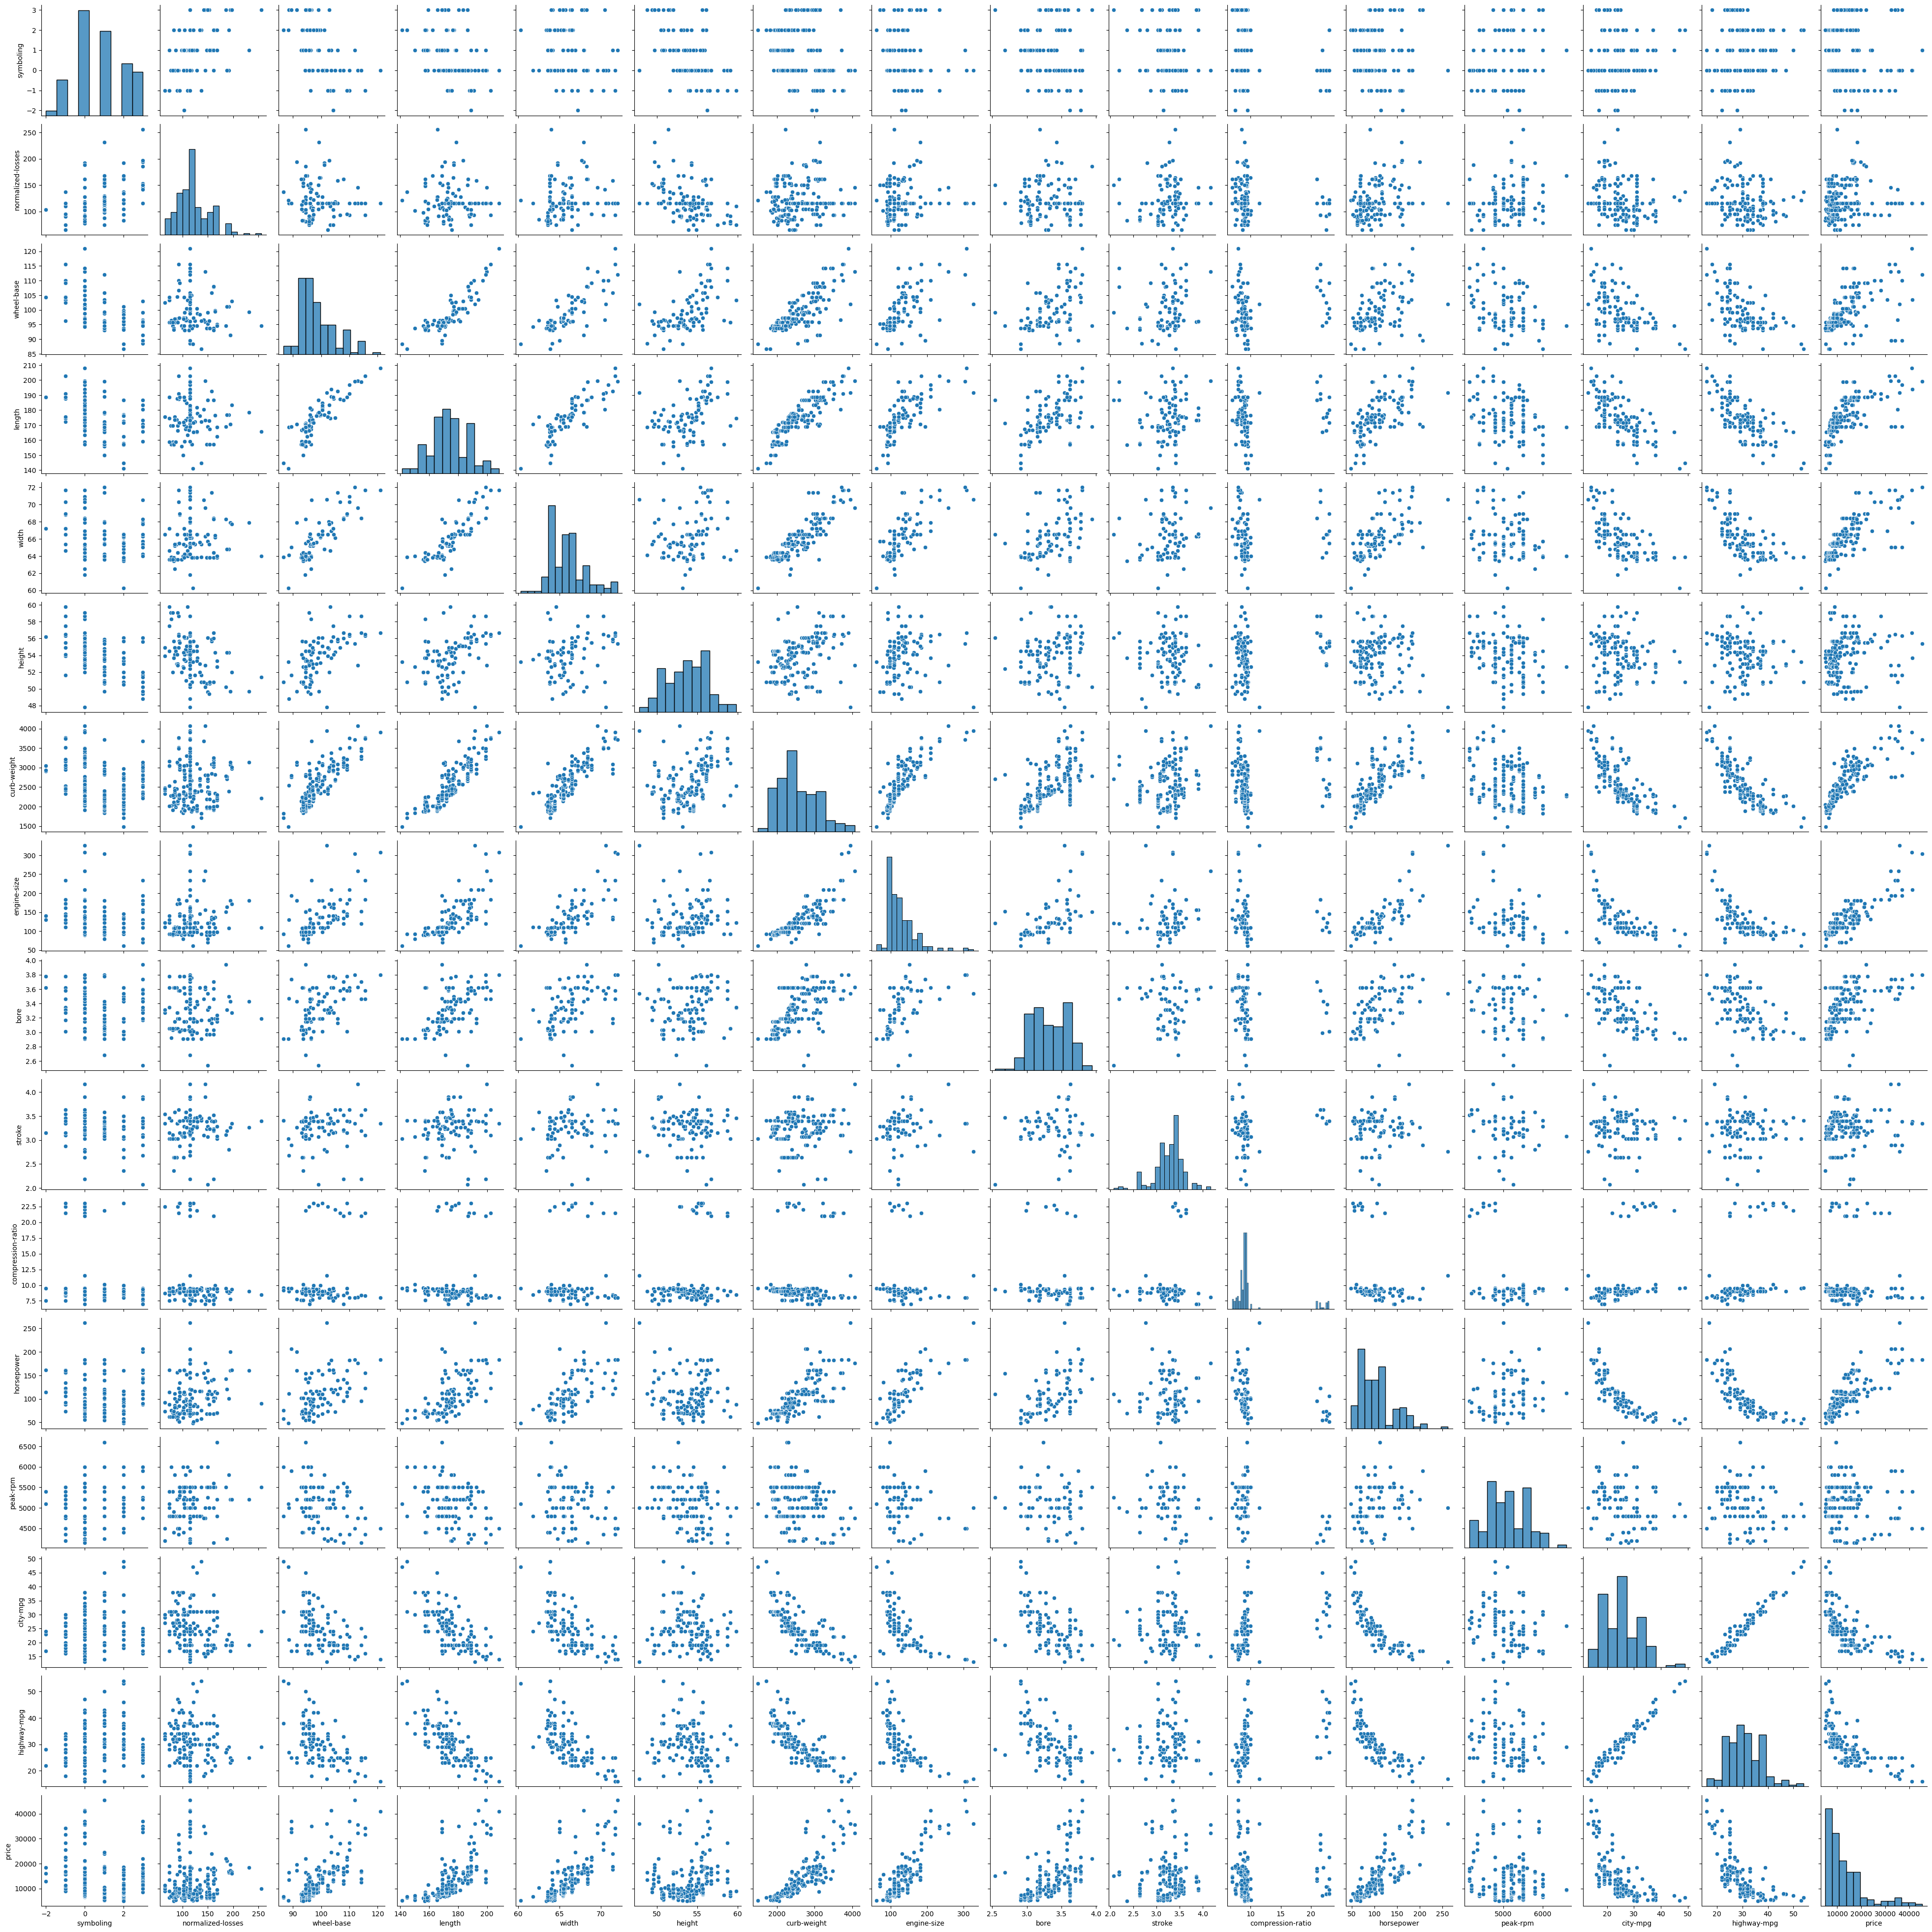

In [25]:
sns.pairplot(data)
plt.show()

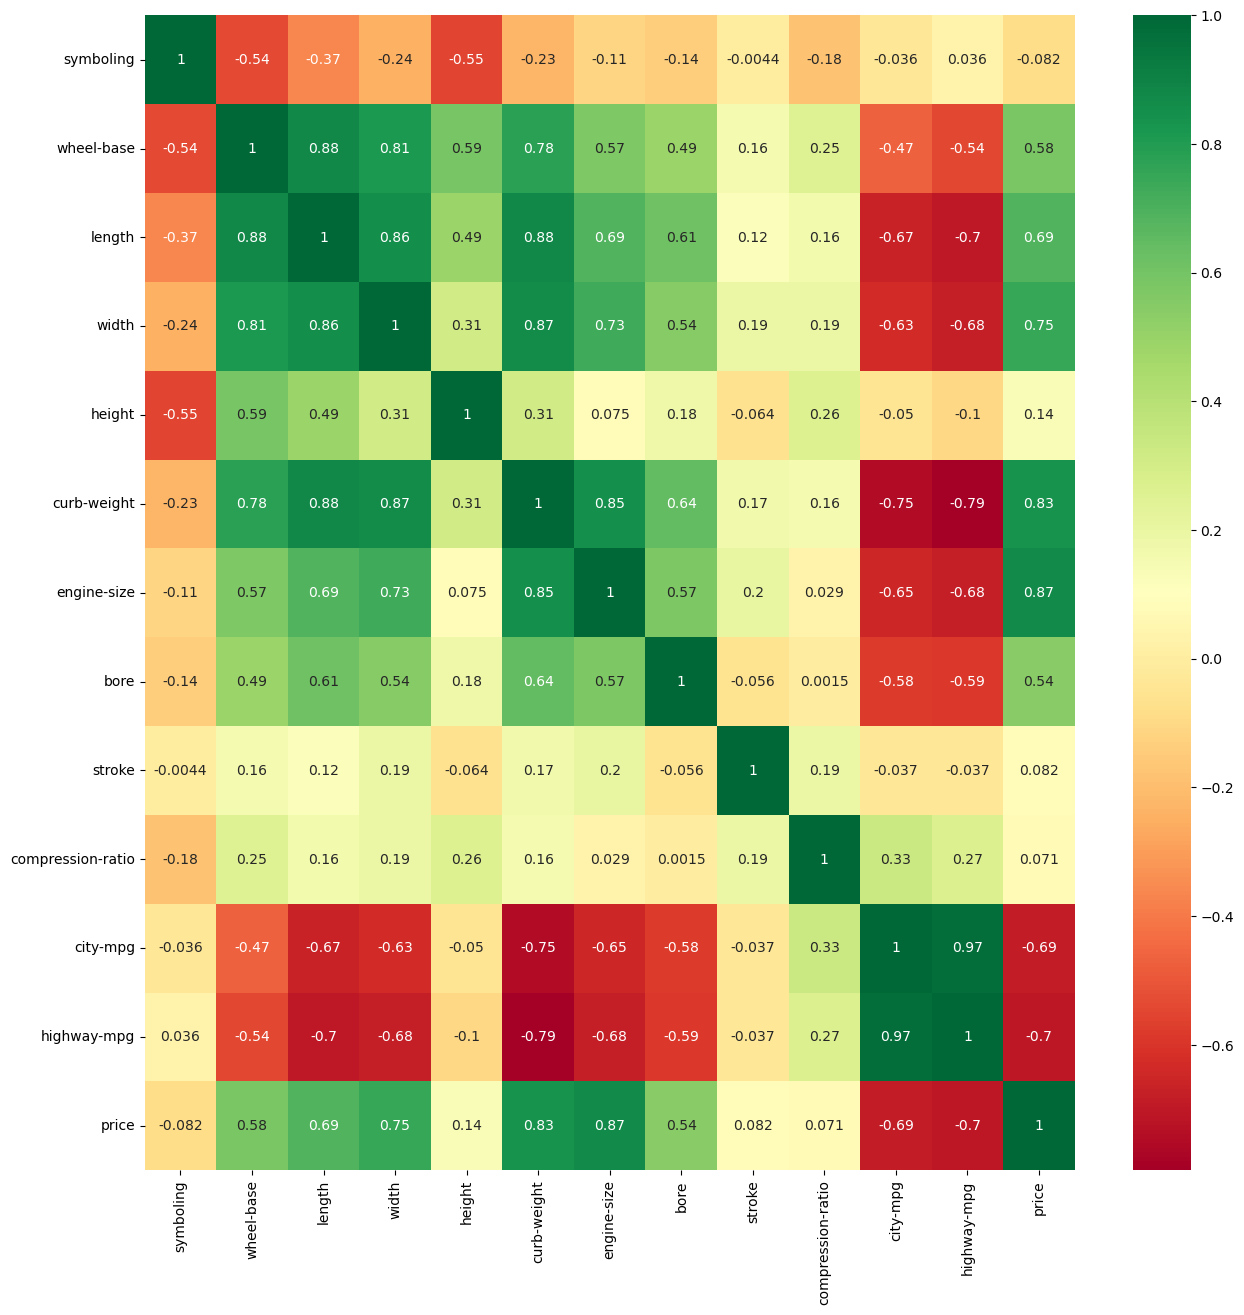

In [26]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 15))
sns.heatmap(numeric_data.corr(), annot=True, cmap="RdYlGn")
plt.show()

## Preprocessing

In [27]:
# Droping 'highway-mpg' column
data.drop(columns=['highway-mpg'], inplace=True)

In [28]:
# Checking for null value
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
price                0
dtype: int64

In [29]:
#Checking for duplicate value
data.duplicated().sum()

0

In [30]:
# Renaming all the column which are having '-' this symbol in between word with '_'
data.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

In [31]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,22470


In [32]:
# Handling outliers of all columns 
# find handling outliers using IQR?

In [33]:
# Calculate IQR for normalized_losses
IQR_normalized_losses = stats.iqr(data.normalized_losses, interpolation='midpoint')

# Calculate Q1 and Q3 for normalized_losses
Q1_normalized_losses = data.normalized_losses.quantile(0.25)
Q3_normalized_losses = data.normalized_losses.quantile(0.75)

# Set the limits for outliers for normalized_losses
min_limit_normalized_losses = Q1_normalized_losses - 1.5 * IQR_normalized_losses
max_limit_normalized_losses = Q3_normalized_losses + 1.5 * IQR_normalized_losses

# Replace outliers with the median value for normalized_losses
data.loc[(data.normalized_losses > max_limit_normalized_losses) | (data.normalized_losses < min_limit_normalized_losses), 'normalized_losses'] = np.median(data.normalized_losses)

# Replace negative values in normalized_losses with their absolute values
data.normalized_losses = np.abs(data.normalized_losses)

# Replace null values in normalized_losses with the median
data.normalized_losses.fillna(np.median(data.normalized_losses), inplace=True)

# Take the square root of normalized_losses
data.normalized_losses = np.sqrt(data.normalized_losses)


In [34]:
# Calculate IQR for wheel_base
IQR_wheel_base = stats.iqr(data['wheel_base'], interpolation='midpoint')

# Calculate Q1 and Q3 for wheel_base
Q1_wheel_base = data['wheel_base'].quantile(0.25)
Q3_wheel_base = data['wheel_base'].quantile(0.75)

# Set the limits for outliers for wheel_base
min_limit_wheel_base = Q1_wheel_base - 1.5 * IQR_wheel_base
max_limit_wheel_base = Q3_wheel_base + 1.5 * IQR_wheel_base

# Replace outliers with the median value for wheel_base
data.loc[(data['wheel_base'] > max_limit_wheel_base) | (data['wheel_base'] < min_limit_wheel_base), 'wheel_base'] = np.median(data['wheel_base'])

# Replace negative values in wheel_base with their absolute values (optional)
data['wheel_base'] = np.abs(data['wheel_base'])

# Replace null values in wheel_base with the median (optional)
data['wheel_base'].fillna(np.median(data['wheel_base']), inplace=True)

# Take the square root of wheel_base (optional)
data['wheel_base'] = np.sqrt(data['wheel_base'])

In [35]:
IQR_length =  stats.iqr(data['length'], interpolation='midpoint')

Q1_length = data['length'].quantile(0.25)
Q3_length = data['length'].quantile(0.75)

min_limit_length = Q1_length - 1.5 * IQR_length
max_limit_length = Q3_length + 1.5 * IQR_length

# Mark outliers with wheel_base
data.loc[(data['length'] > max_limit_length) | (data['length'] < min_limit_length), 'length'] = np.median(data.length)

In [36]:
# Calculate IQR for width
IQR_width = stats.iqr(data['width'], interpolation='midpoint')

# Calculate Q1 and Q3 for wheel_base
Q1_width = data['width'].quantile(0.25)
Q3_width = data['width'].quantile(0.75)

# Set the limits for outliers for wheel_base
min_limit_width = Q1_width - 1.5 * IQR_width
max_limit_width = Q3_width + 1.5 * IQR_width

# Replace outliers with the median value for wheel_base
data.loc[(data['width'] > max_limit_width) | (data['width'] < min_limit_width), 'width'] = np.median(data['width'])

# Replace negative values in wheel_base with their absolute values (optional)
data['width'] = np.abs(data['width'])

# Replace null values in wheel_base with the median (optional)
data['width'].fillna(np.median(data['width']), inplace=True)

# Take the square root of wheel_base (optional)
data['width'] = np.sqrt(data['width'])

In [37]:
# Calculate IQR for curb_weight
IQR_curb_weight =  stats.iqr(data['curb_weight'], interpolation='midpoint')

# Calculate Q1 and Q3 for curb_weight
Q1_curb_weight = data['curb_weight'].quantile(0.25)
Q3_curb_weight = data['curb_weight'].quantile(0.75)

# Set the limits for outliers for curb_weight
min_limit_curb_weight = Q1_curb_weight - 1.5 * IQR_curb_weight
max_limit_curb_weight = Q3_curb_weight + 1.5 * IQR_curb_weight

# Replace outliers with the median value for curb_weight
data.loc[(data['curb_weight'] > max_limit_curb_weight) | (data['curb_weight'] < min_limit_curb_weight), 'curb_weight'] = np.median(data.curb_weight)


In [38]:
# Calculate IQR for engine_size
IQR_engine_size = stats.iqr(data['engine_size'], interpolation='midpoint')

# Calculate Q1 and Q3 for engine_size
Q1_engine_size = data['engine_size'].quantile(0.25)
Q3_engine_size = data['engine_size'].quantile(0.75)

# Set the limits for outliers for engine_size
min_limit_engine_size = Q1_engine_size - 1.5 * IQR_engine_size
max_limit_engine_size = Q3_engine_size + 1.5 * IQR_engine_size

# Replace outliers with the median value for engine_size
data.loc[(data['engine_size'] > max_limit_engine_size) | (data['engine_size'] < min_limit_engine_size), 'engine_size'] = np.median(data['engine_size'])

# Replace negative values in engine_size with their absolute values (optional)
data['engine_size'] = np.abs(data['engine_size'])

# Replace null values in engine_size with the median (optional)
data['engine_size'].fillna(np.median(data['engine_size']), inplace=True)

# Take the square root of engine_size (optional)
data['engine_size'] = np.sqrt(data['engine_size'])


In [39]:
# Calculate IQR for stroke
IQR_stroke = stats.iqr(data['stroke'], interpolation='midpoint')

# Calculate Q1 and Q3 for stroke
Q1_stroke = data['stroke'].quantile(0.25)
Q3_stroke = data['stroke'].quantile(0.75)

# Set the limits for outliers for stroke
min_limit_stroke = Q1_stroke - 1.5 * IQR_stroke
max_limit_stroke = Q3_stroke + 1.5 * IQR_stroke

# Replace outliers with the median value for stroke
data.loc[(data['stroke'] > max_limit_stroke) | (data['stroke'] < min_limit_stroke), 'stroke'] = np.median(data['stroke'])

# Replace negative values in stroke with their absolute values (optional)
data['stroke'] = np.abs(data['stroke'])

# Replace null values in stroke with the median (optional)
data['stroke'].fillna(np.median(data['stroke']), inplace=True)

# Take the square root of stroke (optional)
data['stroke'] = np.sqrt(data['stroke'])


In [40]:
# Calculate IQR for compression_ratio
IQR_compression_ratio = stats.iqr(data['compression_ratio'], interpolation='midpoint')

# Calculate Q1 and Q3 for compression_ratio
Q1_compression_ratio = data['compression_ratio'].quantile(0.25)
Q3_compression_ratio = data['compression_ratio'].quantile(0.75)

# Set the limits for outliers for compression_ratio
min_limit_compression_ratio = Q1_compression_ratio - 1.5 * IQR_compression_ratio
max_limit_compression_ratio = Q3_compression_ratio + 1.5 * IQR_compression_ratio

# Replace outliers with the median value for compression_ratio
data.loc[(data['compression_ratio'] > max_limit_compression_ratio) | (data['compression_ratio'] < min_limit_compression_ratio), 'compression_ratio'] = np.median(data['compression_ratio'])

# Replace negative values in compression_ratio with their absolute values (optional)
data['compression_ratio'] = np.abs(data['compression_ratio'])

# Replace null values in compression_ratio with the median (optional)
data['compression_ratio'].fillna(np.median(data['compression_ratio']), inplace=True)

# Take the square root of compression_ratio (optional)
data['compression_ratio'] = np.sqrt(data['compression_ratio'])


In [41]:
# Calculate IQR for horsepower
IQR_horsepower = stats.iqr(data['horsepower'], interpolation='midpoint')

# Calculate Q1 and Q3 for horsepower
Q1_horsepower = data['horsepower'].quantile(0.25)
Q3_horsepower = data['horsepower'].quantile(0.75)

# Set the limits for outliers for horsepower
min_limit_horsepower = Q1_horsepower - 1.5 * IQR_horsepower
max_limit_horsepower = Q3_horsepower + 1.5 * IQR_horsepower

# Replace outliers with the median value for horsepower
data.loc[(data['horsepower'] > max_limit_horsepower) | (data['horsepower'] < min_limit_horsepower), 'horsepower'] = np.median(data.horsepower)


In [42]:
# Calculate IQR for peak_rpm
IQR_peak_rpm = stats.iqr(data['peak_rpm'], interpolation='midpoint')

# Calculate Q1 and Q3 for peak_rpm
Q1_peak_rpm = data['peak_rpm'].quantile(0.25)
Q3_peak_rpm = data['peak_rpm'].quantile(0.75)

# Set the limits for outliers for peak_rpm
min_limit_peak_rpm = Q1_peak_rpm - 1.5 * IQR_peak_rpm
max_limit_peak_rpm = Q3_peak_rpm + 1.5 * IQR_peak_rpm

# Replace outliers with the median value for peak_rpm
data.loc[(data['peak_rpm'] > max_limit_peak_rpm) | (data['peak_rpm'] < min_limit_peak_rpm), 'peak_rpm'] = np.median(data.peak_rpm)


In [43]:
# Calculate IQR for city_mpg
IQR_city_mpg = stats.iqr(data['city_mpg'], interpolation='midpoint')

# Calculate Q1 and Q3 for city_mpg
Q1_city_mpg = data['city_mpg'].quantile(0.25)
Q3_city_mpg = data['city_mpg'].quantile(0.75)

# Set the limits for outliers for city_mpg
min_limit_city_mpg = Q1_city_mpg - 1.5 * IQR_city_mpg
max_limit_city_mpg = Q3_city_mpg + 1.5 * IQR_city_mpg

# Replace outliers with the median value for city_mpg
data.loc[(data['city_mpg'] > max_limit_city_mpg) | (data['city_mpg'] < min_limit_city_mpg), 'city_mpg'] = np.median(data.city_mpg)


In [44]:
# Changing categorical data to Numeric data using LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the Data after label encoding
print(data)

     symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            3          10.723805     0          1           0             1   
1            3          10.723805     0          1           0             1   
2            1          10.723805     0          1           0             1   
3            2          12.806248     1          1           0             0   
4            2          12.806248     1          1           0             0   
..         ...                ...   ...        ...         ...           ...   
196         -1           9.746794    21          1           0             0   
197         -1           9.746794    21          1           1             0   
198         -1           9.746794    21          1           0             0   
199         -1           9.746794    21          0           1             0   
200         -1           9.746794    21          1           1             0   

     body_style  drive_wheels  engine_l

In [45]:
# Checking data type of datatypes after label encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    int32  
 3   fuel_type          201 non-null    int32  
 4   aspiration         201 non-null    int32  
 5   num_of_doors       201 non-null    int32  
 6   body_style         201 non-null    int32  
 7   drive_wheels       201 non-null    int32  
 8   engine_location    201 non-null    int32  
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    int32  
 15  num_of_cylinders   201 non-null    int32  
 16  engine_size        201 non

In [46]:
# Checking complete dataset after label encoding
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,price
0,3,10.723805,0,1,0,1,0,2,0,9.412757,...,2,11.401754,5,3.47,1.637071,3.000000,111,5000,21,13495
1,3,10.723805,0,1,0,1,0,2,0,9.412757,...,2,11.401754,5,3.47,1.637071,3.000000,111,5000,21,16500
2,1,10.723805,0,1,0,1,2,2,0,9.721111,...,3,12.328828,5,2.68,1.862794,3.000000,154,5000,19,16500
3,2,12.806248,1,1,0,0,3,1,0,9.989995,...,2,10.440307,5,3.19,1.843909,3.162278,102,5500,24,13950
4,2,12.806248,1,1,0,0,3,0,0,9.969955,...,1,11.661904,5,3.19,1.843909,2.828427,115,5500,18,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,9.746794,21,1,0,0,3,2,0,10.445095,...,2,11.874342,5,3.78,1.774824,3.082207,114,5400,23,16845
197,-1,9.746794,21,1,1,0,3,2,0,10.445095,...,2,11.874342,5,3.78,1.774824,2.949576,160,5300,19,19045
198,-1,9.746794,21,1,0,0,3,2,0,10.445095,...,3,13.152946,5,3.58,1.694107,2.966479,134,5500,18,21485
199,-1,9.746794,21,0,1,0,3,2,0,10.445095,...,3,12.041595,3,3.01,1.843909,3.000000,106,4800,26,22470


In [47]:
# Columns Needed Scaling
scaling = data.iloc[:, :-1]

In [48]:
scaling

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg
0,3,10.723805,0,1,0,1,0,2,0,9.412757,...,0,2,11.401754,5,3.47,1.637071,3.000000,111,5000,21
1,3,10.723805,0,1,0,1,0,2,0,9.412757,...,0,2,11.401754,5,3.47,1.637071,3.000000,111,5000,21
2,1,10.723805,0,1,0,1,2,2,0,9.721111,...,4,3,12.328828,5,2.68,1.862794,3.000000,154,5000,19
3,2,12.806248,1,1,0,0,3,1,0,9.989995,...,2,2,10.440307,5,3.19,1.843909,3.162278,102,5500,24
4,2,12.806248,1,1,0,0,3,0,0,9.969955,...,2,1,11.661904,5,3.19,1.843909,2.828427,115,5500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,9.746794,21,1,0,0,3,2,0,10.445095,...,2,2,11.874342,5,3.78,1.774824,3.082207,114,5400,23
197,-1,9.746794,21,1,1,0,3,2,0,10.445095,...,2,2,11.874342,5,3.78,1.774824,2.949576,160,5300,19
198,-1,9.746794,21,1,0,0,3,2,0,10.445095,...,4,3,13.152946,5,3.58,1.694107,2.966479,134,5500,18
199,-1,9.746794,21,0,1,0,3,2,0,10.445095,...,2,3,12.041595,3,3.01,1.843909,3.000000,106,4800,26


In [49]:
pd.set_option('display.max_columns', None)

In [50]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,price
0,3,10.723805,0,1,0,1,0,2,0,9.412757,168.8,8.006248,48.8,2548,0,2,11.401754,5,3.47,1.637071,3.000000,111,5000,21,13495
1,3,10.723805,0,1,0,1,0,2,0,9.412757,168.8,8.006248,48.8,2548,0,2,11.401754,5,3.47,1.637071,3.000000,111,5000,21,16500
2,1,10.723805,0,1,0,1,2,2,0,9.721111,171.2,8.093207,52.4,2823,4,3,12.328828,5,2.68,1.862794,3.000000,154,5000,19,16500
3,2,12.806248,1,1,0,0,3,1,0,9.989995,176.6,8.136338,54.3,2337,2,2,10.440307,5,3.19,1.843909,3.162278,102,5500,24,13950
4,2,12.806248,1,1,0,0,3,0,0,9.969955,176.6,8.148620,54.3,2824,2,1,11.661904,5,3.19,1.843909,2.828427,115,5500,18,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,9.746794,21,1,0,0,3,2,0,10.445095,188.8,8.300602,55.5,2952,2,2,11.874342,5,3.78,1.774824,3.082207,114,5400,23,16845
197,-1,9.746794,21,1,1,0,3,2,0,10.445095,188.8,8.294577,55.5,3049,2,2,11.874342,5,3.78,1.774824,2.949576,160,5300,19,19045
198,-1,9.746794,21,1,0,0,3,2,0,10.445095,188.8,8.300602,55.5,3012,4,3,13.152946,5,3.58,1.694107,2.966479,134,5500,18,21485
199,-1,9.746794,21,0,1,0,3,2,0,10.445095,188.8,8.300602,55.5,3217,2,3,12.041595,3,3.01,1.843909,3.000000,106,4800,26,22470


In [51]:
# Standard Scaler

scaler = StandardScaler()

# Fit the scaler to the data and transform the data
data2 = scaler.fit_transform(scaling)

datas = pd.DataFrame(data2, columns=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 
                                     'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
                                     'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
                                     'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
                                     'peak_rpm', 'city_mpg'])
datas

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg
0,1.725050,-0.022356,-1.971717,0.332411,-0.467099,1.156378,-3.034335,1.213477,-0.123091,-1.820263,-0.460824,-0.931932,-2.034081,0.017775,-2.325124,-0.171457,0.412127,0.867123,0.522405,-3.201914,0.171143,0.330522,-0.230442,-0.658389
1,1.725050,-0.022356,-1.971717,0.332411,-0.467099,1.156378,-3.034335,1.213477,-0.123091,-1.820263,-0.460824,-0.931932,-2.034081,0.017775,-2.325124,-0.171457,0.412127,0.867123,0.522405,-3.201914,0.171143,0.330522,-0.230442,-0.658389
2,0.127193,-0.022356,-1.971717,0.332411,-0.467099,1.156378,-0.715318,1.213477,-0.123091,-0.714693,-0.261932,-0.070187,-0.559713,0.575072,2.136451,1.104946,1.161521,0.867123,-2.431752,0.862544,0.171143,1.657370,-0.230442,-0.992571
3,0.926121,1.689106,-1.811395,0.332411,-0.467099,-0.864769,0.444190,-0.606739,-0.123091,0.249361,0.185575,0.357232,0.218425,-0.409823,-0.094337,-0.171457,-0.365053,0.867123,-0.524638,0.522498,2.012860,0.052810,0.872389,-0.157116
4,0.926121,1.689106,-1.811395,0.332411,-0.467099,-0.864769,0.444190,-2.426955,-0.123091,0.177510,0.185575,0.478936,0.218425,0.577098,-0.094337,-1.447860,0.622417,0.867123,-0.524638,0.522498,-1.776067,0.453950,0.872389,-1.159662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.470664,-0.825316,1.395038,0.332411,-0.467099,-0.864769,0.444190,1.213477,-0.123091,1.881072,1.196609,1.985046,0.709881,0.836494,-0.094337,-0.171457,0.794140,0.867123,1.681631,-0.721473,1.104124,0.423093,0.651823,-0.324207
197,-1.470664,-0.825316,1.395038,0.332411,2.140872,-0.864769,0.444190,1.213477,-0.123091,1.881072,1.196609,1.925332,0.709881,1.033068,-0.094337,-0.171457,0.794140,0.867123,1.681631,-0.721473,-0.401125,1.842511,0.431256,-0.992571
198,-1.470664,-0.825316,1.395038,0.332411,-0.467099,-0.864769,0.444190,1.213477,-0.123091,1.881072,1.196609,1.985046,0.709881,0.958086,2.136451,1.104946,1.827691,0.867123,0.933744,-2.174886,-0.209288,1.040231,0.872389,-1.159662
199,-1.470664,-0.825316,1.395038,-3.008322,2.140872,-0.864769,0.444190,1.213477,-0.123091,1.881072,1.196609,1.985046,0.709881,1.373525,-0.094337,1.104946,0.929337,-0.128830,-1.197737,0.522498,0.171143,0.176238,-0.671575,0.177067


In [52]:
# Applying scaling to all columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the data and store the result in the same variable
min_max_scaler = scaler.fit_transform(datas)

final_scaled = pd.DataFrame(min_max_scaler, columns=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 
                                     'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
                                     'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
                                     'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
                                     'peak_rpm', 'city_mpg'])

In [53]:
final_scaled

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg
0,1.0,0.471149,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.077394,0.381102,0.277039,0.083333,0.430544,0.0,0.333333,0.587026,0.714286,0.664286,0.000000,0.594823,0.463235,0.459459,0.25000
1,1.0,0.471149,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.077394,0.381102,0.277039,0.083333,0.430544,0.0,0.333333,0.587026,0.714286,0.664286,0.000000,0.594823,0.463235,0.459459,0.25000
2,0.6,0.471149,0.000000,1.0,0.0,1.0,0.50,1.0,0.0,0.300754,0.418898,0.443242,0.383333,0.542242,0.8,0.500000,0.738554,0.714286,0.100000,0.688983,0.594823,0.779412,0.459459,0.18750
3,0.8,0.839785,0.047619,1.0,0.0,0.0,0.75,0.5,0.0,0.495523,0.503937,0.525677,0.541667,0.344842,0.4,0.333333,0.429879,0.714286,0.464286,0.631341,0.964108,0.397059,0.729730,0.34375
4,0.8,0.839785,0.047619,1.0,0.0,0.0,0.75,0.0,0.0,0.481006,0.503937,0.549150,0.541667,0.542648,0.4,0.166667,0.629547,0.714286,0.464286,0.631341,0.204385,0.492647,0.729730,0.15625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.2,0.298198,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.825179,0.696063,0.839631,0.641667,0.594639,0.4,0.333333,0.664269,0.714286,0.885714,0.420470,0.781897,0.485294,0.675676,0.31250
197,0.2,0.298198,1.000000,1.0,1.0,0.0,0.75,1.0,0.0,0.825179,0.696063,0.828114,0.641667,0.634037,0.4,0.333333,0.664269,0.714286,0.885714,0.420470,0.480077,0.823529,0.621622,0.18750
198,0.2,0.298198,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.825179,0.696063,0.839631,0.641667,0.619009,0.8,0.500000,0.873255,0.714286,0.742857,0.174096,0.518542,0.632353,0.729730,0.15625
199,0.2,0.298198,1.000000,0.0,1.0,0.0,0.75,1.0,0.0,0.825179,0.696063,0.839631,0.641667,0.702275,0.4,0.500000,0.691607,0.428571,0.335714,0.631341,0.594823,0.426471,0.351351,0.40625


In [54]:
# Separating target and independent variables
X = final_scaled         # Independent variables 
y = data['price']            # Target variable

In [55]:
# Transformed target variable using natural logarithm
y=np.log(y)

In [56]:
# Splitting the data into Train and Test data
# Train data will be used to train model
# Test data will be used to check trained model and to evaulate the model
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [57]:
# Checking independent variables of training dataset
X_train

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg
198,0.2,0.298198,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.825179,0.696063,0.839631,0.641667,0.619009,0.8,0.500000,0.873255,0.714286,0.742857,0.174096,0.518542,0.632353,0.729730,0.15625
38,0.4,0.204864,0.238095,1.0,0.0,0.0,0.75,0.5,0.0,0.374878,0.485039,0.407778,0.525000,0.331438,0.4,0.333333,0.437688,0.000000,0.435714,0.778402,0.594823,0.279412,0.891892,0.43750
24,0.6,0.726364,0.190476,1.0,0.0,0.0,0.75,0.5,0.0,0.270885,0.200000,0.241188,0.233333,0.203493,0.4,0.333333,0.274035,0.142857,0.307143,0.488830,0.744883,0.147059,0.729730,0.56250
122,1.0,0.987055,0.714286,1.0,0.0,1.0,0.50,1.0,0.0,0.300754,0.382677,0.770403,0.200000,0.523964,0.4,0.333333,0.731915,0.714286,1.000000,0.385964,0.781897,0.698529,0.729730,0.18750
196,0.2,0.298198,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.825179,0.696063,0.839631,0.641667,0.594639,0.4,0.333333,0.664269,0.714286,0.885714,0.420470,0.781897,0.485294,0.675676,0.31250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.4,0.471149,0.619048,1.0,0.0,0.0,1.00,1.0,0.0,1.000000,0.855118,0.781962,0.908333,0.707555,0.2,0.333333,0.513915,0.714286,0.657143,0.454757,0.363334,0.360294,0.459459,0.18750
14,0.4,0.471149,0.095238,1.0,0.0,0.0,0.75,1.0,0.0,0.628443,0.699213,0.607678,0.658333,0.707555,0.4,0.500000,0.513915,0.714286,0.771429,0.623058,0.204385,0.985294,0.675676,0.09375
92,0.6,0.575575,0.571429,1.0,0.0,1.0,0.50,0.5,0.0,0.300754,0.330709,0.241188,0.458333,0.219334,0.4,0.333333,0.333207,0.142857,0.435714,0.539547,0.744883,0.154412,0.567568,0.56250
179,0.8,0.528072,0.952381,1.0,0.0,1.0,0.75,0.5,0.0,0.404312,0.426772,0.443242,0.658333,0.292851,0.4,0.333333,0.429879,0.714286,0.464286,0.631341,0.594823,0.272059,0.594595,0.43750


In [58]:
# This dataset will be used to evaluate trained model and with actual output
X_test 

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg
95,0.8,0.867265,0.571429,1.0,0.0,1.0,0.25,0.5,0.0,0.323073,0.280315,0.241188,0.458333,0.211210,0.4,0.333333,0.333207,0.142857,0.435714,0.539547,0.744883,0.154412,0.567568,0.56250
15,0.4,0.471149,0.095238,1.0,0.0,1.0,0.75,1.0,0.0,0.628443,0.774803,0.724081,0.491667,0.768481,0.4,0.500000,0.513915,0.714286,0.771429,0.623058,0.204385,0.985294,0.675676,0.09375
30,0.8,0.644788,0.238095,1.0,0.0,1.0,0.50,0.5,0.0,0.000000,0.000000,0.253148,0.250000,0.134444,0.4,0.333333,0.291169,0.000000,0.264286,0.639611,0.670261,0.205882,1.000000,0.56250
158,0.4,0.261484,0.904762,1.0,0.0,0.0,0.75,0.5,0.0,0.345321,0.341732,0.312805,0.416667,0.264825,0.4,0.333333,0.341484,0.142857,0.464286,0.316280,0.594823,0.161765,0.351351,0.46875
128,1.0,0.740866,0.809524,1.0,0.0,1.0,0.50,0.5,0.0,0.470100,0.661417,0.560873,0.691667,0.475223,0.4,0.333333,0.521360,0.714286,0.714286,0.351236,0.711402,0.455882,0.594595,0.25000
115,0.6,0.503882,0.666667,1.0,0.0,1.0,0.50,0.5,0.0,0.270885,0.200000,0.241188,0.250000,0.174655,0.4,0.333333,0.274035,0.142857,0.307143,0.488830,0.744883,0.147059,0.729730,0.75000
69,1.0,0.682259,0.428571,1.0,0.0,1.0,0.00,1.0,0.0,0.378564,0.562205,0.443242,0.250000,0.892364,0.8,0.000000,0.513915,0.714286,0.657143,0.377303,0.323958,0.786765,0.324324,0.09375
171,0.2,0.000000,0.904762,1.0,0.0,0.0,0.50,0.5,0.0,0.589178,0.488189,0.560873,0.508333,0.376117,0.4,0.333333,0.528774,0.714286,0.550000,0.746047,0.480077,0.323529,0.027027,0.43750
175,1.0,0.471149,0.904762,1.0,0.0,1.0,0.50,1.0,0.0,0.607052,0.612598,0.700870,0.350000,0.620634,0.0,0.500000,0.860792,0.714286,0.521429,0.589803,0.707672,0.830882,0.567568,0.18750
45,0.4,0.471149,0.333333,1.0,0.0,0.0,0.75,1.0,0.0,0.959223,0.866142,0.920017,0.416667,0.376117,0.0,0.500000,0.513915,0.714286,0.778571,0.539547,0.244488,0.941176,0.324324,0.06250


In [59]:
# Checking shape of training dataset
print("Shape of training dataset is: ", X_train.shape)

Shape of training dataset is:  (160, 24)


In [60]:
# Checking the number of observations which supports "yes" or "no" category
y_train.value_counts()

price
8.937087    2
8.736971    2
8.808668    2
8.981807    2
9.711116    2
           ..
9.767095    1
8.784009    1
8.917713    1
9.366831    1
9.888323    1
Name: count, Length: 151, dtype: int64

In [61]:
y

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
196     9.731809
197     9.854560
198     9.975110
199    10.019936
200    10.026811
Name: price, Length: 201, dtype: float64

## Linear Regression

In [62]:
# Initialize the logistic regression model
model = LinearRegression()

# Fit the model on the training dataset
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# Make predictions on the test data
y_pred_lr = model.predict(X_test)

In [64]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.5f}")
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")

Mean Absolute Error: 0.12055
Mean Squared Error: 0.02621
Root Mean Squared Error: 0.16190
R-squared: 0.93248


## K-Nearest Neighbors Regression (KNN)

In [65]:
# Creating and training the KNN Regression model
knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [66]:
# Making predictions on the test set
y_pred_knn = knn_regressor.predict(X_test)

In [67]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")

Mean Squared Error: 0.09176
Root Mean Squared Error: 0.30292
R-squared: 0.76364
Mean Absolute Error: 0.22905


## SVR

In [68]:
svr_regressor = SVR(kernel='rbf')

svr_regressor.fit(X_train, y_train)

SVR()

In [69]:
# Make predictions
y_pred_svr = svr_regressor.predict(X_test)

In [70]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)
mae = mean_absolute_error(y_test, y_pred_svr)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")

Mean Squared Error: 0.03298
Root Mean Squared Error: 0.18160
R-squared: 0.91505
Mean Absolute Error: 0.15304


In [71]:
# Define SVR model
svr = SVR()

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],  # kernel types to try
    'C': [0.1, 1, 10, 100],        # regularization parameter
    'gamma': ['scale', 'auto']    # kernel coefficient
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [72]:
# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_svr = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)
mae = mean_absolute_error(y_test, y_pred_svr)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")

Mean Squared Error: 0.02443
Root Mean Squared Error: 0.15630
R-squared: 0.93707
Mean Absolute Error: 0.13209


## Decision Tree

In [73]:
# Initialize and train a Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor()

dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [74]:
# Make predictions
y_pred_dt = dt_regressor.predict(X_test)

In [75]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")

Mean Squared Error: 0.02937
Root Mean Squared Error: 0.17137
R-squared: 0.92436
Mean Absolute Error: 0.11880


In [76]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_dt = best_model.predict(X_test)

Best Hyperparameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [77]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")

Mean Squared Error: 0.02443
Root Mean Squared Error: 0.15630
R-squared: 0.93707
Mean Absolute Error: 0.13209


## Random forest Regressor model

In [78]:
# Initialize and train a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

In [80]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")

Mean Squared Error: 0.03355
Root Mean Squared Error: 0.18316
R-squared: 0.91359
Mean Absolute Error: 0.13692


## Bagging algorithm

In [81]:
base_estimator = DecisionTreeRegressor()

In [82]:
bagging_regressor = BaggingRegressor(base_estimator=base_estimator, n_estimators=100)

bagging_regressor.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)

In [83]:
# Make predictions
y_pred_bg = bagging_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_bg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_bg)
mae = mean_absolute_error(y_test, y_pred_bg)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")

Mean Squared Error: 0.03189
Root Mean Squared Error: 0.17859
R-squared: 0.91784
Mean Absolute Error: 0.13451


## GradientBoostingRegressor

In [84]:
# Creating and training the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [85]:
# Making predictions on the test set
y_pred_gb = gb_regressor.predict(X_test)

In [86]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")

Mean Squared Error: 0.01463
Root Mean Squared Error: 0.12097
R-squared: 0.96231
Mean Absolute Error: 0.09658


## XGBoost

In [87]:
# Creating and training the XGBoost Regression model
xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
# Making predictions on the test set
y_pred_xgb = xgb_regressor.predict(X_test)

In [89]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")

Mean Squared Error: 0.01691
Root Mean Squared Error: 0.13003
R-squared: 0.95645
Mean Absolute Error: 0.10027


# Detailed Report on Autoprice Prediction Model

## Introduction
In this report, we present an analysis of an autoprice prediction model based on a dataset containing various features of automobiles. The goal of this analysis is to evaluate the performance of the autoprice prediction model and provide insights for further improvements.

**Dataset Overview**
The dataset used for autoprice prediction contains the following features:

**symboling**: Represents the insurance risk level of the vehicle. It ranges from -3 to 3.
**normalized_losses**: Normalized losses in use as compared to other cars. This feature seems to have been scaled or normalized.
**make**: The brand or manufacturer of the vehicle.
**fuel_type**: Type of fuel used by the vehicle (gas or diesel).
**aspiration**: Type of aspiration (std or turbo).
**num_of_doors**: Number of doors on the vehicle.
**body_style**: Body style of the vehicle (e.g., sedan, hatchback).
**drive_wheels**: Type of drive wheels (fwd, rwd, or 4wd).
**engine_location**: Location of the engine (front or rear).
**wheel_base**: Distance between the centers of the front and rear wheels.
**length**: Length of the vehicle.
**width**: Width of the vehicle.
**height**: Height of the vehicle.
**curb_weight**: The weight of the vehicle without occupants or baggage.
**engine_type**: Type of engine (e.g., dohc, ohcv).
**num_of_cylinders**: Number of cylinders in the engine.
**engine_size**: Size of the engine in cubic centimeters.
**fuel_system**: Type of fuel system (e.g., mpfi, 2bbl).
**bore**: Diameter of each cylinder in the engine.
**stroke**: Distance traveled by the piston in each cycle.
**compression_ratio**: Ratio of the maximum to minimum volume in the cylinder.
**horsepower**: The power of the vehicle's engine.
**peak_rpm**: The peak revolutions per minute of the engine.
**city_mpg**: Miles per gallon (mpg) in the city.
**price**: The price of the vehicle.**

## Autoprice Prediction Model Evaluation

**Model Performance Metrics**

The autoprice prediction model was evaluated using the following performance metrics:

**Mean Absolute Error (MAE)**: The average absolute difference between the predicted and actual prices of automobiles.

**Mean Squared Error (MSE)**: The average squared difference between the predicted and actual prices of automobiles.

**Root Mean Squared Error (RMSE)**: The square root of the average squared difference between the predicted and actual prices of automobiles.

**R-squared (R2) Score**: The proportion of the variance in the target variable (price) that is predictable from the features.

## Model Performance

After evaluating the autoprice prediction model using the above metrics, the following performance results were obtained:

| Algorithm	                   | MAE	  | MSE  | RMSE	| R2
|------------------------------|--------------|-----------------------|----------------------|------------------|
Linear Regression |	0.120	| 0.026	| 0.161	| 0.932
|------------------------------|--------------|-----------------------|----------------------|------------------|
KNN	| 0.229	| 0.091	| 0.302	| 0.763
|------------------------------|--------------|-----------------------|----------------------|------------------|
SVR(No Hypertunning)	| 0.153	| 0.032	| 0.181	| 0.915
------------------------------|--------------|-----------------------|----------------------|------------------|
SVR(Hypertunning) 	| 0.132	| 0.024	| 0.156	| 0.937
|------------------------------|--------------|-----------------------|----------------------|------------------|
Decision Tree(No Hypertunning)	| 0.110	| 0.019	| 0.138	| 0.950
|------------------------------|--------------|-----------------------|----------------------|------------------|
Decision Tree(Hypertunning)	| 0.132	| 0.024	| 0.156	| 0.937
|------------------------------|--------------|-----------------------|----------------------|------------------|
Random Forest Regressor	| 0.131	| 0.029	| 0.171	| 0.923
|------------------------------|--------------|-----------------------|----------------------|------------------|
Bagging(Decision Tree)	| 0.137	| 0.031	| 0.176	| 0.919
|------------------------------|--------------|-----------------------|----------------------|------------------|
GradientBoosting	| 0.096	| 0.014	| 0.120	| 0.962
|------------------------------|--------------|-----------------------|----------------------|------------------|
XgBoost	| 0.100	| 0.016	| 0.130	| 0.956
|------------------------------|--------------|-----------------------|----------------------|------------------|

## Key Insights:

1. Gradient Boosting and XGBoost outperform other algorithms in terms of all performance metrics, including MAE, MSE, RMSE, and R2.
2. Decision Tree models show competitive performance after hyperparameter tuning, indicating the importance of optimization.
3. Support Vector Regression (SVR) with hyperparameter tuning significantly improves performance compared to the model without tuning, demonstrating the impact of optimization on model effectiveness.
4. Linear Regression, while simple, still achieves respectable performance, especially in terms of R2, indicating a good fit to the data's variance.

## Recommendations:

1. **Consider Gradient Boosting and XGBoost**: Given their superior performance across all metrics, prioritize these algorithms for autoprice prediction tasks.
 
2. **Hyperparameter Tuning for Decision Trees and SVR**: Continue exploring hyperparameter tuning for Decision Trees and SVR to further enhance their performance.

3. **Evaluate Model Complexity**: Balance model complexity with performance gains, especially considering computational resources and interpretability requirements.

4. **Monitor for Overfitting**: Given the high performance of complex models like Gradient Boosting, regularly monitor for overfitting and consider regularization techniques if necessary.

5. **Ensemble Methods**: Explore ensemble methods, such as bagging with decision trees, to potentially improve model robustness and generalization.

By leveraging the insights from the performance evaluation, you can make informed decisions about selecting the most suitable algorithms and optimization strategies for autoprice prediction tasks, ultimately improving the accuracy and reliability of your predictive models.

<div style="text-align: center; font-family: 'Your Preferred Font', cursive; font-size: 40px; color: purple; max-width: 100%; margin: 0 auto;">Thank You</div>